# **Latar Belakang**

Dalam upaya untuk meraih pangsa pasar dengan tepat sasaran, sebuah supermarket perlu menegtahui produk apa saja yang menjadi produk unggulan yang banyak diminati oleh konsumennya. Hal ini bertujuan agar kebutuhan konsumen dapat terpenuhi.

Supermarket ingin lebih memahami target konsumennya sehingga usaha yang dijalankannya dapat memberikan hasil yang optimal. Manfaat memahami target konsumen (pangsa pasar) dapat digunakan untuk mengidentifikasi strategi perusahaannya atas produk yang dijual sudah tepat sasaran atau belum. 

# **Perumusan Masalah**

Perusahaan ingin **mengidentifikasi target konsumennya** yang dapat ditargetkan untuk memasarkan sebuah produk tertentu yang sesuai dengan kebutuhan, keinginan, dan karakteristik pembeli.

Sehingga sebagai seorang data analyst hal ini kami lakukan perumusan masalah sebagai berikut:

`Bagaimana Market Segmentation (Demographic Segmentation dan Behavioral Segmentation) berdasarkan karakteristik pembeli di Supermarket untuk meraih pangsa pasar dengan tepat sasaran?`

Berdasarkan permasalahan diatas, kita sebagai data analyst mencoba untuk mengidenttifikasi segmentasi pasar yang terjadi di Supermarket tersebut dengan data berikut ini:

In [124]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import warnings
warnings.filterwarnings('ignore')

In [125]:
df = pd.read_csv('Supermarket Customers.csv')

## **1. Dataset**

Data set ini berisikan informasi mengenai data pelanggan pada suatu Supermarket dalam 2 tahun terakhir. Data set ini terdiri dari 2240 baris dan 29 Kolom yang menyampaikan informasi sebagai berikut:

**Informasi Atribut**

| Attribute | Tipe Data | Deskripsi |
| --- | --- | --- | 
| ID | Numerikal | ID unik setiap pelanggan |
| Year Birth | Numerikal | Tahun lahir pelanggan | 
| Education | Kategorikal | Latar belakang pendidikan pelanggan | 
| Marital Status | Kategorikal | Status pernikahan | 
| Income | Numerikal | Pendapatan pelanggan | 
|Kidhome | Numerikal | Jumlah anak yang ada di rumah pelanggan | 
| Teenhome             | Numerikal|  Jumlah anak remaja yang ada di rumah pelanggan| 
| Dt_Customer          |Dttime |  Tanggal pendaftaran pelanggan| 
| Recency              | Numerikal|  Jumlah hari sejak pembelian terakhir pelanggan| 
| MntWines            | Numerikal|  Jumlah pembelian Wine dalam 2 tahun terakhir   | 
| MntFruits           | Numerikal|  Jumlah pembelian Buah-buahan dalam 2 tahun terakhir | 
| MntMeatProducts     | Numerikal|  Jumlah pembelian Daging dalam 2 tahun terakhir | 
| MntFishProducts     |Numerikal |  Jumlah pembelian Ikan dalam 2 tahun terakhir   | 
| MntSweetProducts    | Numerikal|  Jumlah pembelian Produk Manis dalam 2 tahun terakhir |     
| MntGoldProds        | Numerikal|  Jumlah pembelian Emas dalam 2 tahun terakhir| 
| NumDealsPurchases   |Numerikal |  Jumlah pembelian yang dilakukan dengan diskon |   
| NumWebPurchases     | Numerikal|  Jumlah pembelian yang dilakukan melalui situs web perusahaan|  
| NumCatalogPurchases |Numerikal |  Jumlah pembelian yang dilakukan menggunakan katalog | 
| NumStorePurchases   |Numerikal |  Jumlah pembelian yang dilakukan langsung di toko| 
| NumWebVisitsMonth   |Numerikal|  Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir| 
| AcceptedCmp1        |Numerikal |  Penawaran, 1 jika pelanggan menerima tawaran di kampanye pertama, 0 sebaliknya| 
| AcceptedCmp2        |Numerikal |  Penawaran, 1 jika pelanggan menerima tawaran di kampanye ke-2, 0 sebaliknya| 
| AcceptedCmp3        |Numerikal |  Penawaran, 1 jika pelanggan menerima tawaran di kampanye ke-3, 0 sebaliknya| 
| AcceptedCmp4        |Numerikal |  Penawaran, 1 jika pelanggan menerima tawaran di kampanye ke-4, 0 sebaliknya| 
| AcceptedCmp5        |Numerikal |  Penawaran, 1 jika pelanggan menerima tawaran di kampanye ke-5, 0 sebaliknya| 
| Complain            |Numerikal |  Keluhan, 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 sebaliknya| 
|Response            | Numerikal|Penawaran, 1 jika pelanggan menerima tawaran di kampanye terakhir, 0 sebaliknya|
|Z_Cost_Contact      ||
|Z_Revenue           ||

In [126]:
df.shape

(2240, 29)

Berikut ini 5 baris pertama dan 5 baris terakhir dataset Supermarket Customer:

In [127]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [128]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## **2. Data Understanding**

Sebelum kita melakukan Data Preparation (Cleaning data), diperlukan kita untuk mengetahui informasi apa saja terkait datanya.

Menampilkan informasi data terkait kolom apa saja, tipe data apa saja hingga terdapat jumlah kolom dan baris yang terdapat pada DataFrame.
DataFrame ini terdiri dari 2239 baris dan 29 kolom, terdapat 1 kolom dengan tipe data float, 25 kolom dengan tipe data integer, dan 3 kolom dengan tipe data object(categorical).

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Berikut ini informasi data statistik descriptive dari data-data numerikal seperti:
- Menampilkan measures of central tendency (mean, median, modus)
- Menampilkan measures of spread seperti standar deviasi dan IQR
- Menampilkan rangkuman statistik yang lain seperti count, Q1, Q3, min, max

In [130]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Berikut ini merupakan informasi data statistik descriptive dari data-data categorical:

In [131]:
df.describe(include=object)

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [132]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

## **3. Data Preparation**

### **a. Check Data Duplikat**

Berdasarkan data dibawah ini, secara general data tidak memiliki data duplikat.

In [133]:
df.duplicated().sum()

0

Namun kami menemukan 182 data yang sama, namun ID customernya berbeda.

In [134]:
df.drop(columns='ID').duplicated().sum()

182

Berikut ini 5 contoh data yang terdapat duplikat.

In [135]:
df[df.drop(columns='ID').duplicated(keep=False)].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,3,0,0,1,1,0,0,3,11,1
17,4939,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,...,7,0,0,0,0,0,0,3,11,0
23,4047,1954,PhD,Married,65324.0,0,1,11-01-2014,0,384,...,4,0,0,0,0,0,0,3,11,0
24,1409,1951,Graduation,Together,40689.0,0,1,18-03-2013,69,270,...,8,0,0,0,0,0,0,3,11,0
29,1966,1965,PhD,Married,84618.0,0,0,22-11-2013,96,684,...,2,0,0,1,0,0,0,3,11,0


Sebagai contoh Tabel dibawah ini menunjukkan bahwa data indeks ke- 393 dan 1771 memiliki data yang sama persis, namun hanya ID customer yang berbeda.

In [136]:
df[(df['Year_Birth']== 1946) & (df['Education']== 'PhD') & (df['Marital_Status']== 'Married')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
393,455,1946,PhD,Married,51012.0,0,0,18-04-2013,86,102,...,6,0,0,0,0,0,0,3,11,0
1771,7592,1946,PhD,Married,51012.0,0,0,18-04-2013,86,102,...,6,0,0,0,0,0,0,3,11,0


#### **Handling Data Duplikat**
Pada kasus ini ditemukan data duplikat sebanyak 182 data, namun ID customer-nya berbeda. Sehingga penanganan data duplikat pada kasus ini `tidak dilakukan drop data`. Karena `ID customer merupakan data unique` yang membedakan customer satu dengan customer lainnya. Sehingga diasumsikan customer yang berbeda memiliki data transaksi yang sama.

### **b. Check Missing Value**

In [137]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Berdasarkan hasil check missing value terdapat `24 data yang kosong pada kolom Income`. Terdapat 2 cara untuk menangani *missing value* yaitu dengan cara:
- Menghapus baris/kolom yang terdapat *missing value*. Dalam kasus ini cara menghapus baris dapat dilakukan, karena jumlah *missinng value* tergolong sedikit/kecil hanya 24 data dari 2239 data.
- Mengisi data pada baris/kolom yang terdapat *missing value* dengan value dengan secara statistik yang memiliki domain knowledge yang berkaitan dengan data yang kosong. Data yang kosong juga dapat diisi secara statistik dengan nilai mean, median atau modus.

Sehingga cara menghapus data direkomendasikan menjadi pilihan terakhir.

In [138]:
df= df.rename(columns={
    'MntWines' : 'Wines',
    'MntFruits' : 'Fruits',
    'MntMeatProducts' : 'Meat Products',
    'MntSweetProducts' : 'Sweet Products',
    'MntFishProducts' : 'Fish Products',
    'MntGoldProds' : 'Gold Products'
    })
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Sebelum melakukan *handling missing value* pada data terdapat nama data yang tidak seragam. Sehingga tahap selanjutnya, kita melakukan penamaan data sesuai dengan kelompoknya. 

#### **Merubah Kolom**

#### **Kolom `Education` : 2n Cycle menjadi Master**

In [139]:
df.loc[df['Education']=='2n Cycle','Education'] = 'Master'

In [140]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

#### **Kolom `Marital_Status` :** 
- Alone, YOLO, Absurd menjadi Single
- Together menjadi Married
- Widow menjadi Divorce

In [141]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [142]:
df.loc[df['Marital_Status']=='Alone','Marital_Status'] = 'Single'
df.loc[df['Marital_Status']=='YOLO','Marital_Status'] = 'Single'
df.loc[df['Marital_Status']=='Absurd','Marital_Status'] = 'Single'
df.loc[df['Marital_Status']=='Together','Marital_Status'] = 'Married'
df.loc[df['Marital_Status']=='Widow','Marital_Status'] = 'Divorced'

In [143]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

Berikut ini merupakan data yang memiliki missing value pada kolom Income:

In [144]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,Master,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Married,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


### **Handling Missing Value di Kolom Income**

Untuk mengatasi nilai missing value di kolom Income, kami dengan cara mengisi nilai Income.

In [145]:
df['Income'][~df['Income'].isna()]

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2216, dtype: float64

Sebelum melakukan pengisian nilai income, kita ingin mengetahui data Income Berdistribusi Normal atau tidak untuk menentukan nilai yang akan diisikan pada kolom income Nilai Mean atau Nilai Mediannya. 

- Data Income tidak berdistribusi normal sehingga, nilai kosong pada kolom Income kita isi dengan nilai median.

In [146]:
normaltest(df['Income'].dropna())

NormaltestResult(statistic=2943.373569541277, pvalue=0.0)

Nilai Income yang kosong kita isi dengan nilai median. Namun apabila semua data yang terdapat missing value pada Income diisi dengan nilai median yang sama, maka terjadi frekruensi yang menumpuk di nilai median tersebut. 

Sehingga kami mencoba melakukan pendekatan dengan mengambil contoh data lain yang memiliki nilai income berdasarkan data Edukasi, Marital_Status, dan Year_Birth.

In [147]:
df[(df['Education']=='Graduation') & (df['Marital_Status']=='Married') & (df['Year_Birth']==1983)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
95,7516,1983,Graduation,Married,30096.0,1,0,22-05-2014,30,5,...,6,0,0,0,0,0,0,3,11,0
185,3518,1983,Graduation,Married,25271.0,1,0,05-12-2012,45,10,...,9,0,0,0,0,0,0,3,11,0
334,9592,1983,Graduation,Married,22010.0,1,0,30-06-2013,51,11,...,8,0,0,0,0,0,0,3,11,0
421,3129,1983,Graduation,Married,30096.0,1,0,22-05-2014,30,5,...,6,0,0,0,0,0,0,3,11,0
584,5756,1983,Graduation,Married,39453.0,1,0,03-04-2014,64,46,...,6,0,0,0,0,0,0,3,11,0
877,10602,1983,Graduation,Married,39922.0,1,0,14-02-2013,30,29,...,8,0,0,0,0,0,0,3,11,0
892,10925,1983,Graduation,Married,76630.0,0,0,14-01-2014,93,255,...,1,0,0,0,0,0,0,3,11,0
1088,5577,1983,Graduation,Married,43776.0,1,0,03-05-2014,77,8,...,6,0,0,0,0,0,0,3,11,0
1233,1502,1983,Graduation,Married,28427.0,1,0,21-03-2013,67,18,...,8,0,0,0,0,0,0,3,11,0


Dapat dilihat terdapat 18 Data yang memiliki kesamaan data berdasarkan Edukasi, Marital_Status, dan Year_Birth dengan data indeks ke-10 yang memiliki nilai missing value pada kolom Income.

Hal ini kita gunakan nilai median Income dari data-data yang memiliki kesamaan pada data Edukasi, Marital_Status, dan Year_Birth untuk mengisi nilai Income yang missing value.

In [148]:
df['Income']= df['Income'].fillna(df.groupby(['Education', 'Marital_Status', 'Year_Birth' ])['Income'].transform('median'))

Untuk memastikan, contoh data indeks ke-10 kita isi dengan nilai median income dari data Edukasi : 'Graduation', Marital_Status : 'Married', dan Year_Birth :1983, yang memiliki nilai median 37041.

In [149]:
df[(df['Education']=='Graduation') & (df['Marital_Status']=='Married') & (df['Year_Birth']==1983)]['Income'].median()

37041.0

Pengecekan data indeks ke-10, nilai income sudah terisi dengan nilai median income dari data-data yang memiliki kesamaan berdasarkan Education, Marital_Status, dan Year_birth.

In [150]:
df.iloc[[10]]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,37041.0,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0


Ketika kita sudah melakukan input nilai income seperti cara diatas, untuk memastikan bahwa sudah tidak terdapat missing value pada kolom income. Namun ternyata terdapat 1 data masih terdapat missing value sebagai berikut:

In [151]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2084,5250,1943,Master,Divorced,NaN,0,0,30-10-2013,75,532,...,1,0,0,1,0,0,0,3,11,1


Hal ini dikarenakan tidak ditemukan data yang sama berdasarkan 3 kriteria tersebut dan terdapat syarat yang tidak terpenuhi yaitu Marital_Status.

Setelah dilakukan pengecekan ulang dengan menghapus syarat kolom Marital_Status, terdapat 2 data yang sama. Yang kita jadikan acuan sebagai penentuan nilai median income dari kedua data tersebut.

In [152]:
df[(df['Education']=='Master') & (df['Year_Birth']==1943)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
358,6142,1943,Master,Married,65073.0,0,0,20-08-2013,65,629,...,2,0,0,0,0,0,1,3,11,0
1923,4994,1943,Master,Single,77598.0,0,0,01-10-2013,53,1193,...,3,0,0,1,0,0,0,3,11,0
2084,5250,1943,Master,Divorced,NaN,0,0,30-10-2013,75,532,...,1,0,0,1,0,0,0,3,11,1


In [153]:
df[(df['Education']=='Master') & (df['Year_Birth']==1943)]['Income'].median()

71335.5

In [154]:
df.loc[2084, 'Income'] = df[(df['Education']=='Master') & (df['Year_Birth']==1943)]['Income'].median()

Sudah tidak terdapat nilai missing value pada kolom income

In [155]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [156]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
Wines                  0
Fruits                 0
Meat Products          0
Fish Products          0
Sweet Products         0
Gold Products          0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## **c. Penambahan Kolom yang Dibutuhkan**

#### **Kolom Jumlah Transaksi by Campaign**

Kolom Sumcmp ini digunakan untuk mengetahui pelanggan yang melakukan transaksi dan membeli disemua campaign.

In [157]:
df['SumCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,SumCmp
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,0
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,0


#### **Kolom Total Produk**

Kolom Total_Product ini digunakan sebagai jumlah produk yang dibeli oleh pelanggan

In [158]:
df['Total_Product'] = df['Wines'] + df['Fruits'] + df['Meat Products'] + df['Fish Products'] + df['Sweet Products'] + df['Gold Products']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,SumCmp,Total_Product
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,0,27
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,0,776
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,0,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,0,422


#### **Kolom Total Frekuensi Pembelian/Transaksi (Total Purchase)**
Kolom Total_Product ini digunakan sebagai jumlah transaksi atau berapa kali pelanggan melakukan transaksi di Supermarket ini (baik dari berbagai jenis media)

In [159]:
#kolom total_purchases --> bisa dibandingin sm kolom NumDealsPurchases
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchases']]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases
0,8,10,4,22
1,1,1,2,4
2,8,2,10,20
3,2,0,4,6
4,5,3,6,14
...,...,...,...,...
2235,9,3,4,16
2236,8,2,5,15
2237,2,3,13,18
2238,6,5,10,21


#### **Kolom Age**

In [160]:
df['Age']= 2015 - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,SumCmp,Total_Product,Total_Purchases,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,1,1617,22,58
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,0,27,4,61
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,0,776,20,50
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,0,53,6,31
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,0,422,14,34


#### **Kolom Month Year**

In [161]:
df['Month Year'] = df['Dt_Customer'].apply(lambda x : str(x)[3:])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,SumCmp,Total_Product,Total_Purchases,Age,Month Year
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,1,1617,22,58,09-2012
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,0,27,4,61,03-2014
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,0,776,20,50,08-2013
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,0,53,6,31,02-2014
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,0,422,14,34,01-2014


## **d. Menghapus Kolom yang tidak Dibutuhkan**

In [162]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits',
       'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'SumCmp',
       'Total_Product', 'Total_Purchases', 'Age', 'Month Year'],
      dtype='object')

In [163]:
df= df.drop(columns=['Z_CostContact', 'Z_Revenue'])

## **4. Distribusi Data & Outlier**

### **a. Distribusi Data**

In [164]:
numerical_col= ['Income', 'Age', 'Total_Product', 'Total_Purchases' ]

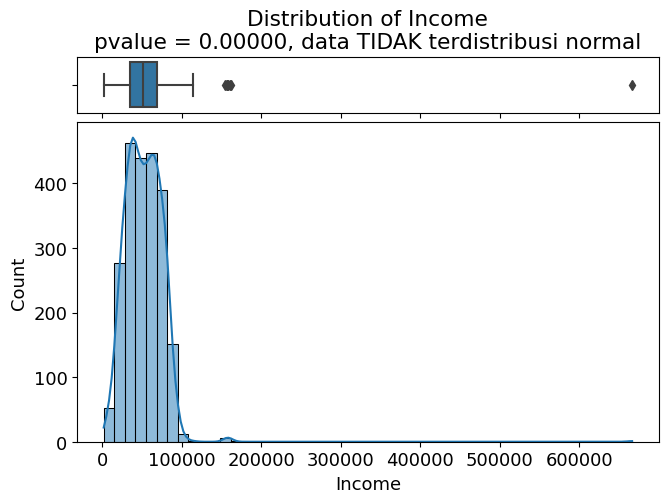

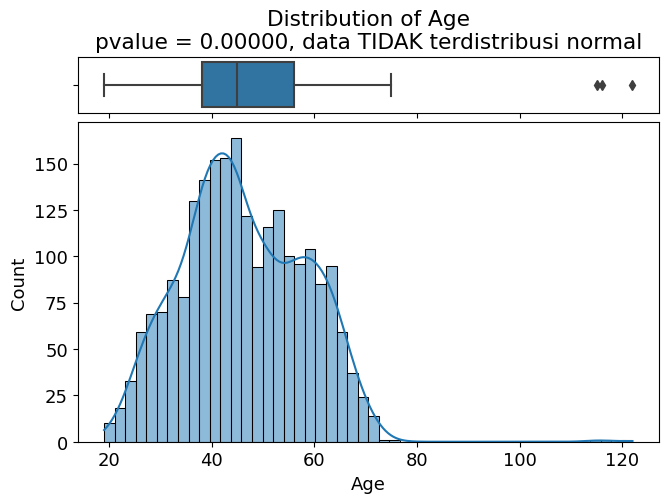

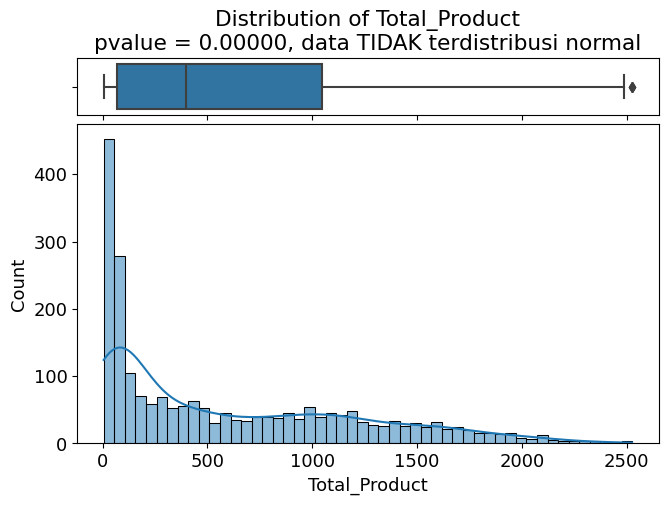

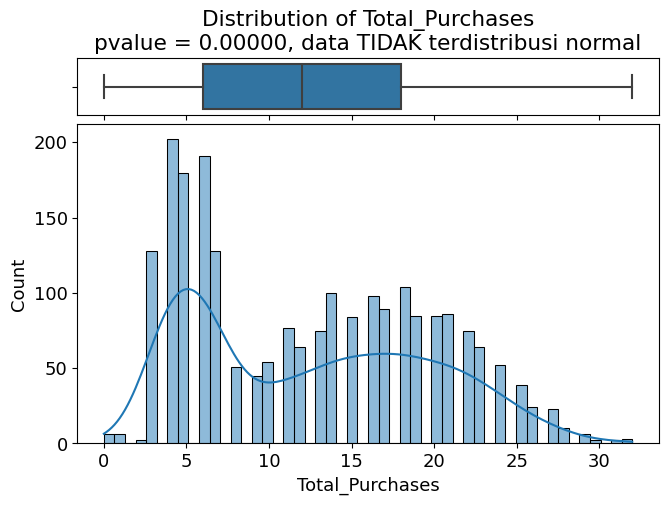

In [165]:
for kolom in numerical_col:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, kde=True, bins=50)

    plt.show()

Berdasarkan histogram dan boxplot dari kolom numerical bahwa `data Income, Age, Total_Product, dan Total_Purchases tidak berdistribusi normal`. Terdapat outlier pada data Income, Age, dan Total_Product. Namun pada Total_Product tidak dilakukan penanganan atau menghapus data outlier karena customer dapat membeli dalam jumlah tersebut. `Handling Outlier dilakukan pada data Income & Age` sebagai berikut:

### **b. Identifikasi Outlier**

### **Outlier Income**

In [166]:
# Q1, Q3, IQR Income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(35409.0, 68325.0, 32916.0)

In [167]:
# Untuk mendeteksi outlier
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print('Lower limit:', lower_limit)
print('Upper limit:', upper_limit)

Lower limit: -13965.0
Upper limit: 117699.0


`Income di bawah -13965.0 atau di atas 117699.0 dapat dipertimbangkan sebagai outlier.`

In [168]:
df[df['Income']> upper_limit]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,SumCmp,Total_Product,Total_Purchases,Age,Month Year
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,1608,22,42,03-2014
617,1503,1976,PhD,Married,162397.0,1,1,03-06-2013,31,85,...,0,0,0,0,0,0,107,1,39,06-2013
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,0,0,0,6,0,40,02-2014
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,1717,29,33,08-2012
1300,5336,1971,Master,Married,157733.0,1,0,04-06-2013,37,39,...,0,0,0,0,0,0,59,2,44,06-2013
1653,4931,1977,Graduation,Married,157146.0,0,0,29-04-2013,13,1,...,0,0,0,0,0,0,1730,28,38,04-2013
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,8,0,66,08-2013
2233,9432,1977,Graduation,Married,666666.0,1,0,02-06-2013,23,9,...,0,0,0,0,0,0,62,7,38,06-2013


Berdasarkan hasil terdapat 8 data Income yang terindikasi Outlier. Data Outlier pada Income tidak dihapus, karena pendapatan customer tersebut masih wajar (Income customer tersebut diatas rata-rata). 

Namun terdapat `anomali data pada Income indeks ke-2233 (Income= 666666.0)` yang dimana data tersebut tidak wajar (Range Income pada data yang terindikasi outlier lainnya berkisar 153924.0 - 160803.0). Sehingga, handling outlier pada data tersebut kami melakukan dengan cara menghapus data outlier tersebut. Karena dirasa nilai pada kolom lainnya pada data indeks tersebut tidak berpengaruh signifikan pada analisis.

### **Handling Outlier Income**

In [169]:
df= df.drop(2233)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,SumCmp,Total_Product,Total_Purchases,Age,Month Year
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,1,1,1617,22,58,09-2012
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,27,4,61,03-2014
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,776,20,50,08-2013
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,53,6,31,02-2014
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,422,14,34,01-2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,1341,16,48,06-2013
2236,4001,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,0,1,444,15,69,06-2014
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,0,1,1241,18,34,01-2014
2238,8235,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,843,21,59,01-2014


### **Outlier Age**

In [170]:
# Q1 & Q3 Income
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
Q1, Q3, IQR


(38.0, 56.0, 18.0)

In [171]:
# Untuk mendeteksi outlier
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print('Lower limit:', lower_limit)
print('Upper limit:', upper_limit)


Lower limit: 11.0
Upper limit: 83.0


`Age di bawah 11 atau di atas 83 tahun dapat dipertimbangkan sebagai outlier.`

In [172]:
df[df['Age']>83]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,SumCmp,Total_Product,Total_Purchases,Age,Month Year
192,7829,1900,Master,Divorced,36640.0,1,0,26-09-2013,99,15,...,0,0,0,1,0,0,65,5,115,09-2013
239,11004,1893,Master,Single,60182.0,0,1,17-05-2014,23,8,...,0,0,0,0,0,0,22,3,122,05-2014
339,1150,1899,PhD,Married,83532.0,0,0,26-09-2013,36,755,...,1,0,0,0,0,1,1853,14,116,09-2013


Berdasarkan hasil terdapat `3 data Age yang terindikasi Outlier`. Berikut pendekatan yang digunakan untuk menangani data Outlier pada Data Age:

1.  Typo Input Data User
    
    Contoh pada data indeks ke-339, kita mengasumsikan bahwa user salah input (typo: 1999). Namun ternyata pada data, tidak terdapat customer yang Year_Birth 1999(Maksimum data Year_birth pada tahun : 1996)
2.  Domain Knowledge 
    
    Dapat dilihat 3 data tersebut menunjukkan customer berumur 115, 122, dan 116 dan melakukan transaksi mengunjungi store. Berdasarkan domain knowledge, hal ini tidak wajar dengan umur customer tersebut melakukan transaksi datang ke Store Supermarket.

Sehingga, untuk menangani data Outlier pada Data Age kami menghapus data tersebut dengan cara berikut ini:

In [173]:
df[df['Year_Birth']==1999]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,SumCmp,Total_Product,Total_Purchases,Age,Month Year


#### **Handling Age Outlier**

In [174]:
df= df.drop([192, 239, 339], axis=0)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,SumCmp,Total_Product,Total_Purchases,Age,Month Year
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,1,1,1617,22,58,09-2012
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,27,4,61,03-2014
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,776,20,50,08-2013
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,53,6,31,02-2014
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,422,14,34,01-2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,1341,16,48,06-2013
2236,4001,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,0,1,444,15,69,06-2014
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,0,1,1241,18,34,01-2014
2238,8235,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,843,21,59,01-2014


In [175]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat Products,Fish Products,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,SumCmp,Total_Product,Total_Purchases,Age
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,...,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,5589.008497,1968.898032,51923.942308,0.444097,0.506708,49.116279,304.12746,26.275939,166.983453,37.536225,...,0.074687,0.072451,0.064401,0.013417,0.008945,0.149374,0.447227,605.986583,12.546512,46.101968
std,3244.826887,11.703281,21453.147148,0.538459,0.544609,28.957284,336.59181,39.724007,225.689645,54.648562,...,0.262944,0.259291,0.245520,0.115077,0.094173,0.356536,0.891113,601.865156,7.206577,11.703281
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,19.000000
25%,2828.250000,1959.000000,35376.000000,0.000000,0.000000,24.000000,24.00000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,6.000000,38.000000
50%,5454.500000,1970.000000,51369.000000,0.000000,0.000000,49.000000,174.00000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.500000,12.000000,45.000000
75%,8421.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.25000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1045.500000,18.000000,56.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.00000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2525.000000,32.000000,75.000000


In [176]:
df.shape

(2236, 32)

- Data sebelum cleaning terdapat  2240 baris dan 29 kolom
- Data setelah cleaning terdapat 2236 baris dan 33 kolom

Penghapusan data sebanyak 0.17% dari data sebelumnya.

## **5. Identifikasi & Analisis Market Segmentation**

Menurut **Philip Kotler pada buku Marketing Management (14th Edition, p. 215)**:
<br>
*Market Segmentation* secara general dibagi menjadi 4 kategori yaitu:
- Demographic segmentation (Age, Gender, Income, Education, User status)
- Psychographic segmentation (Interest, life style, motivation, priorities) 
- Behavioral segmentation (Purchasing habits(seberapa sering customer melakukan transaksi?), Spending habits(berapa banyak customer membeli produk?))
- Geographic segmentation (zip code, country, radius around)

Berdasarkan data yang tersedia, pada identifikasi & analisis *market segmentation* yang akan dilakukan pada `demographic segmentation dan behavioral segmentation`

## **a. Demographic Segmentation**
**Education, Age, dan Marital_Status**

In [177]:
edu = df['Education'].value_counts().to_frame().reset_index()
edu

,Education,count
0,Graduation,1126
1,Master,571
2,PhD,485
3,Basic,54


In [178]:
df['Age'].agg(['min', 'max'])

min    19
max    75
Name: Age, dtype: int64

In [179]:
def ageint(age):
    if age >= 65:
        return 'Senior'
    elif age >= 25:
        return 'Adults'
    else:
        return 'Youth'

In [180]:
df['int_age'] = df['Age'].apply(ageint)

In [181]:
age_group = df['int_age'].value_counts().to_frame().reset_index()
age_group

,int_age,count
0,Adults,2057
1,Senior,136
2,Youth,43


In [182]:
df_status= df['Marital_Status'].value_counts().to_frame().reset_index()
df_status

,Marital_Status,count
0,Married,1442
1,Single,486
2,Divorced,308


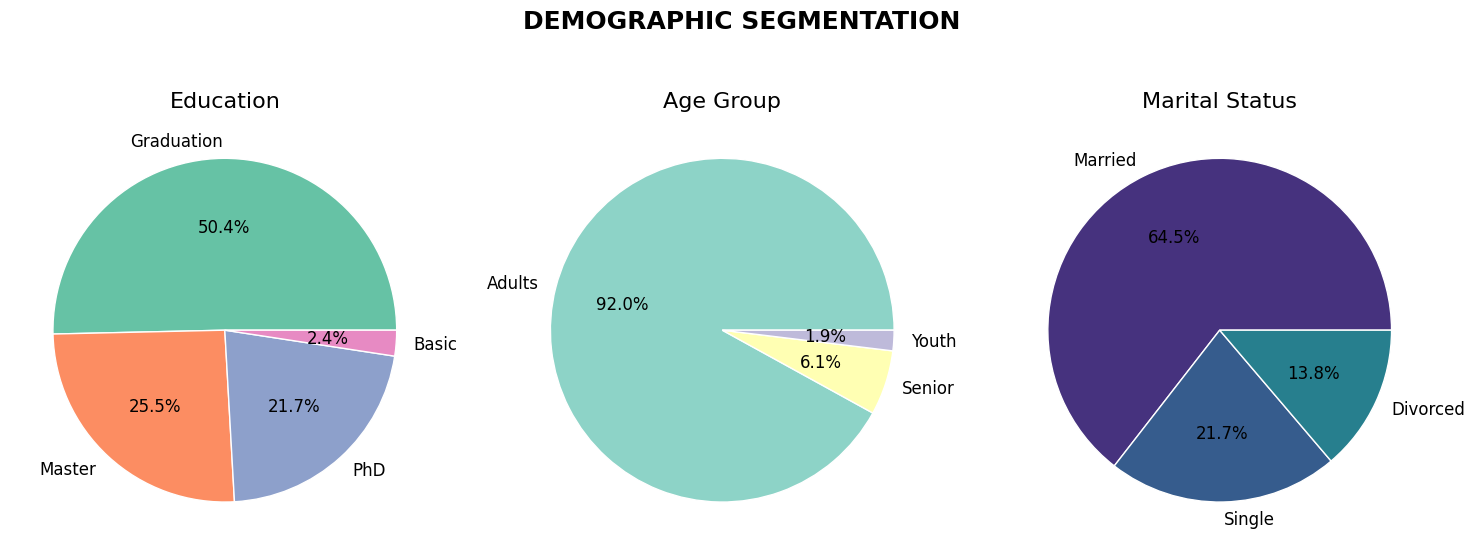

In [183]:
plt.figure(figsize=(15,15))
plt.rcParams['font.size'] = 12.0

# Education
plt.subplot(1, 3, 1) 
plt.pie(
    x= edu['count'],
    labels= edu['Education'],
    autopct= f'%.1f%%',
    explode= [0, 0, 0,0],
    colors=sns.color_palette('Set2'),
    wedgeprops=dict(edgecolor='white')
)
plt.title(label='Education', size=16)


# Age Group
plt.subplot(1, 3, 2) 
plt.pie(
    x= age_group['count'],
    labels= age_group['int_age'],
    autopct= f'%.1f%%',
    explode= [0, 0, 0],
    colors=sns.color_palette('Set3'),
    wedgeprops=dict(edgecolor='white')
)
plt.title(label='Age Group', size=16)


# Marital_status
plt.subplot(1, 3, 3) 
plt.pie(
    x= df_status['count'],
    labels= df_status['Marital_Status'],
    autopct= f'%.1f%%',
    explode= [0, 0, 0],
    colors=sns.color_palette('viridis'),
    wedgeprops=dict(edgecolor='white')
)
plt.title(label='Marital Status', size=16)



#Subtitle
plt.suptitle('DEMOGRAPHIC SEGMENTATION', size=18, y=0.70, fontweight = 'bold')        

plt.tight_layout()
plt.show()

Berdasarkan Gambar `Demographic Segmentation` diatas secara umum kita bisa melihat bahwa:
- `Education: 50.4%` customer supermarket memiliki latar belakang pendidikan `Graduation`
- `Age Group: 92%` customer supermarket memiliki usia di `rentang umur 25-65 tahun (Adults)`
- `Marital_Status: 64.5%` customer supermarket berstatus `Married` 


In [184]:
df[(df['Education']=='Graduation') & (df['Age'] > 25) & (df['Age'] < 65) & (df['Marital_Status']=='Married')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,SumCmp,Total_Product,Total_Purchases,Age,Month Year,int_age
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,776,20,50,08-2013,Adults
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,53,6,31,02-2014,Adults
10,1994,1983,Graduation,Married,37041.0,1,0,15-11-2013,11,5,...,0,0,0,0,0,19,3,32,11-2013,Adults
14,2569,1987,Graduation,Married,17323.0,0,0,10-10-2012,38,3,...,0,0,0,0,0,46,4,28,10-2012,Adults
16,9736,1980,Graduation,Married,41850.0,1,1,24-12-2012,51,53,...,0,0,0,0,0,96,6,35,12-2012,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,4749,1968,Graduation,Married,58554.0,1,1,26-09-2012,55,368,...,0,0,0,0,0,586,16,47,09-2012,Adults
2226,4478,1979,Graduation,Married,63777.0,1,1,24-03-2013,87,457,...,0,0,0,0,0,653,18,36,03-2013,Adults
2229,10084,1972,Graduation,Married,24434.0,2,0,18-05-2014,9,3,...,0,0,0,0,0,50,5,43,05-2014,Adults
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,0,0,0,0,0,30,3,41,07-2013,Adults


Berdasarkan `Demographic Segmentation dengan proporsi yang terbesar` dengan pendidikan: 'Graduation, kelompok usia: 'Adults' dan Marital_Statusnya: 'Married' terdapat `671 Customer atau 30% dari data`. 

### **Income**

Untuk analisis Data Income, dikarenakan Data `Income tidak berdistribusi normal` maka parameter yang digunakan sebagai uji statistik dan analisis kita menggunakan `median`

- #### Income vs Education

In [185]:
df_inc_edc= df.groupby('Education')[['Income']].median().sort_values('Income', ascending=False).reset_index()
df_inc_edc

,Education,Income
0,PhD,55158.0
1,Graduation,52028.5
2,Master,49572.0
3,Basic,20744.0


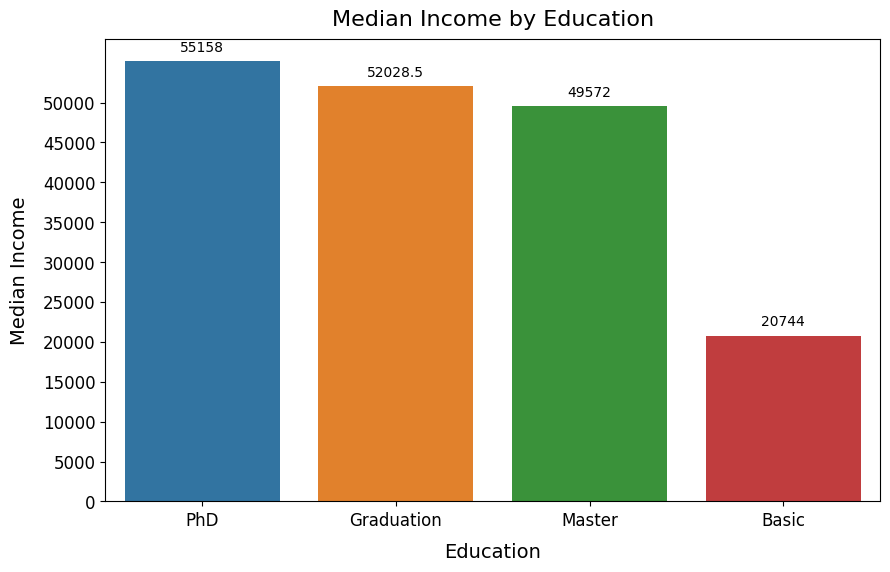

In [186]:
judul = 'Median Income by Education'

plt.figure(figsize=(10,6))

ax= sns.barplot(data=df_inc_edc, x='Education', y='Income', ci=0)

ax.bar_label(ax.containers[0], fontsize=10, padding= 5)

plt.title(judul, size=16, pad=10) 
plt.xlabel('Education', size=14, labelpad = 10)
plt.ylabel('Median Income', size=14, labelpad = 10)
plt.yticks(range(0,55000, 5000))
plt.show()

Berdasarkan grafik diatas dapat dilihat `Median income yang paling tinggi adalah jenjang PhD` dan paling rendah adalah jenjang basic. Sehingga disini kita memiliki 2 praduga sebagai berikut:
- Ke-empat kelompok Education memiliki income yang tidak berbeda jauh
- Semakin tingginya jenjang Educationnya maka semakin tinggi Median Income-nya

Namun praduga ini tidak dapat langsung diambil kesimpulan hanya berdasarkan gambar grafik saja, dibutuhkan uji statistik untuk membuktikan kedua praduga tersebut dengan menggunakan uji sebagai berikut:

- **Kruskal Wallis Test digunakan untuk menguji perbandingan lebih dari 2 sampel independent dalam statistik non-parametrik. Uji ini digunakan untuk menguji terdapat perbedaan signifikan antara Median Income antar kelompok education(PhD, Graduation, Master, Basic)** 

- **Uji korelasi antara education vs income, untuk mengetahui apakah terdapat hubungan antara kelompok Education dengan Income**

Hipotesis :

- Ho : Median Income untuk setiap kelompok education adalah SAMA
- Ha : Minimal ada 1 kelompok yang berbeda median Incomenya. Tetapi kita tidak tahu yang mana.

In [187]:
df_income_education_med= df.groupby('Education')[['Income']].median().reset_index()
df_income_education_med

,Education,Income
0,Basic,20744.0
1,Graduation,52028.5
2,Master,49572.0
3,PhD,55158.0


In [188]:
from scipy.stats import kruskal

In [189]:
stat, pvalue = kruskal(
    df_income_education_med[df_income_education_med['Education']=='Basic']['Income'],
    df_income_education_med[df_income_education_med['Education']=='Graduation']['Income'],
    df_income_education_med[df_income_education_med['Education']=='Master']['Income'],
    df_income_education_med[df_income_education_med['Education']=='PhD']['Income']
)

pvalue

0.3916251762710877

In [190]:
# conclusion
if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada 1 kelompok education yang berbeda median Income-nya. Tetapi kita tidak tahu yang mana.
    (Mediannya TIDAK berbeda signifikan)
    ''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa minimal ada 1 kelompok education yang berbeda median Income-nya. Tetapi kita tidak tahu yang mana.
    (Mediannya berbeda signifikan)
    ''')


    pvalue = 0.39163. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada 1 kelompok education yang berbeda median Income-nya. Tetapi kita tidak tahu yang mana.
    (Mediannya TIDAK berbeda signifikan)
    


`Sesuai dengan praduga pertama bahwa Median Income setiap kelompok Education tidak berbeda signifikan` 

In [191]:
df_copy= df.copy()

In [192]:
def education(edu):
    if edu == 'Basic':
        return 1
    elif edu == 'Graduation':
        return 2
    elif edu == 'Master':
        return 3
    else:
        return 4
    

In [193]:
df_copy['Education']= df_copy['Education'].apply(education)

In [194]:
# Membuat korelasi method spearman
df_copy[['Income', 'Education']].corr(method='spearman')

,Income,Education
Income,1.000000,0.110605
Education,0.110605,1.000000


`Insight Correlation Income vs Education`

- Hubungan antara Income vs Education (0.104) : Positif, Weak
- Semakin tinggi tingkat pendidikan, maka semakin tinggi income-nya namun hubungannya lemah
- Sehingga nilai Income tidak begitu dipengaruhi oleh tingkat pendidikan


- #### Income vs Age

In [195]:
df_age_inc = df[['Age', 'Income']]
df_age_inc.head()

,Age,Income
0,58,58138.0
1,61,46344.0
2,50,71613.0
3,31,26646.0
4,34,58293.0


In [196]:
df_age_inc['interval age'] = df_age_inc['Age'].apply(ageint)
df_age_inc

,Age,Income,interval age
0,58,58138.0,Adults
1,61,46344.0,Adults
2,50,71613.0,Adults
3,31,26646.0,Adults
4,34,58293.0,Adults
...,...,...,...
2235,48,61223.0,Adults
2236,69,64014.0,Senior
2237,34,56981.0,Adults
2238,59,69245.0,Adults


In [197]:
df_intage = df_age_inc.groupby('interval age')[['Income']].median().sort_values('Income', ascending=False).reset_index()
df_intage

,interval age,Income
0,Youth,68682.0
1,Senior,62845.0
2,Adults,50387.0


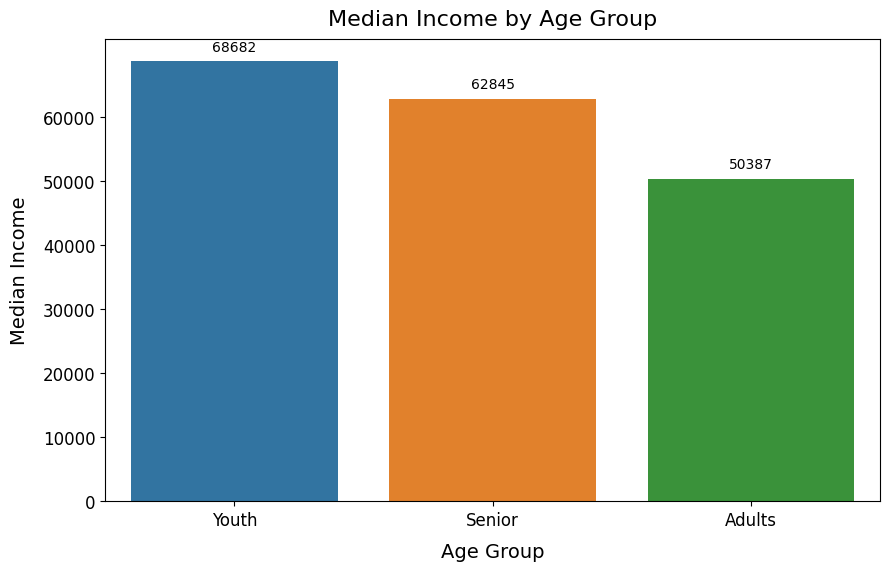

In [198]:
judul = 'Median Income by Age Group'

plt.figure(figsize=(10,6))

ax= sns.barplot(data=df_intage, x='interval age', y='Income', ci=0)

ax.bar_label(ax.containers[0], fontsize=10, padding= 5)

plt.title(judul, size=16, pad=10) 
plt.xlabel('Age Group', size=14, labelpad = 10)
plt.ylabel('Median Income', size=14, labelpad = 10)
plt.yticks(range(0,65000, 10000))
plt.show()

Hipotesis :

- Ho : Median Income untuk setiap kelompok Age adalah SAMA
- Ha : Minimal ada 1 kelompok Age yang berbeda median Incomenya. Tetapi kita tidak tahu yang mana.

In [199]:
df_intage_med = df_age_inc.groupby('interval age')[['Income']].median().reset_index()
df_intage_med

,interval age,Income
0,Adults,50387.0
1,Senior,62845.0
2,Youth,68682.0


In [200]:
stat, pvalue = kruskal(
    df_intage_med[df_intage_med['interval age']=='Adults']['Income'],
    df_intage_med[df_intage_med['interval age']=='Senior']['Income'],
    df_intage_med[df_intage_med['interval age']=='Youth']['Income']
)

pvalue

0.36787944117144245

In [201]:
# conclusion
if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada 1 kelompok Age yang berbeda median Income-nya. Tetapi kita tidak tahu yang mana.
    (Median Income-nya TIDAK berbeda signifikan)
    ''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa minimal ada 1 kelompok Age yang berbeda median Income-nya. Tetapi kita tidak tahu yang mana.
    (Median Income-nya berbeda signifikan)
    ''')


    pvalue = 0.36788. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada 1 kelompok Age yang berbeda median Income-nya. Tetapi kita tidak tahu yang mana.
    (Median Income-nya TIDAK berbeda signifikan)
    


In [202]:
# Membuat korelasi method spearman
df[['Income', 'Age']].corr(method='spearman')

,Income,Age
Income,1.000000,0.221091
Age,0.221091,1.000000


`Insight Correlation Income vs Age group`

- Hubungan antara Income vs Age Group (0.2268) : Positif, Weak
- Semakin tua usia, maka semakin tinggi income-nya namun hubungannya lemah


- #### Income vs Marital Status

In [203]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [204]:
df_marital= df.groupby('Marital_Status')[['Income']].median().sort_values('Income', ascending=False).reset_index()
df_marital

,Marital_Status,Income
0,Divorced,54199.5
1,Married,51540.5
2,Single,48778.0


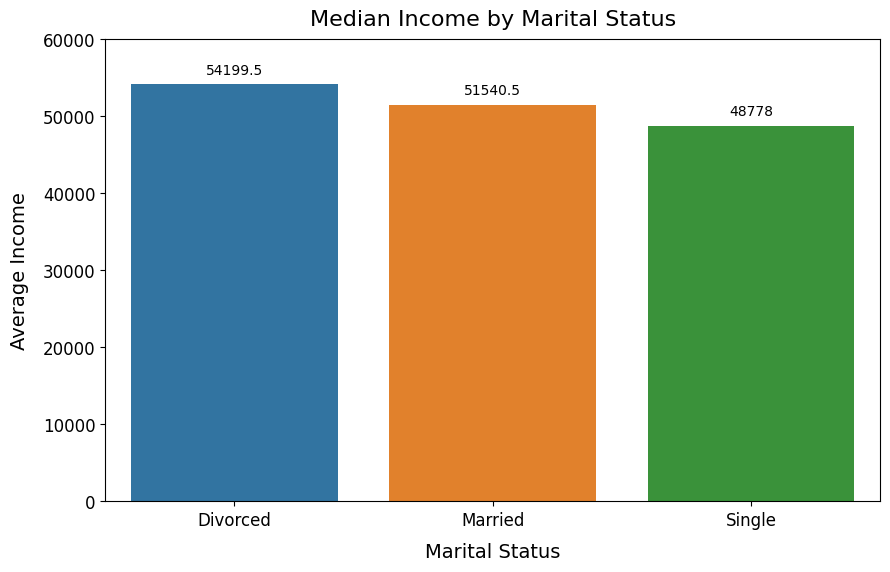

In [205]:
judul = 'Median Income by Marital Status'

plt.figure(figsize=(10,6))

ax= sns.barplot(data=df_marital, x='Marital_Status', y='Income', ci=0)

ax.bar_label(ax.containers[0], fontsize=10, padding= 5)

plt.title(judul, size=16, pad=10) 
plt.xlabel('Marital Status', size=14, labelpad = 10)
plt.ylabel('Average Income', size=14, labelpad = 10)
plt.yticks(range(0,65000, 10000))
plt.show()

In [206]:
correlation = df_copy[['Income', 'Education', 'Age']].corr()
correlation

,Income,Education,Age
Income,1.000000,0.127937,0.203009
Education,0.127937,1.000000,0.139555
Age,0.203009,0.139555,1.000000


In [207]:
matriks = np.triu(correlation)

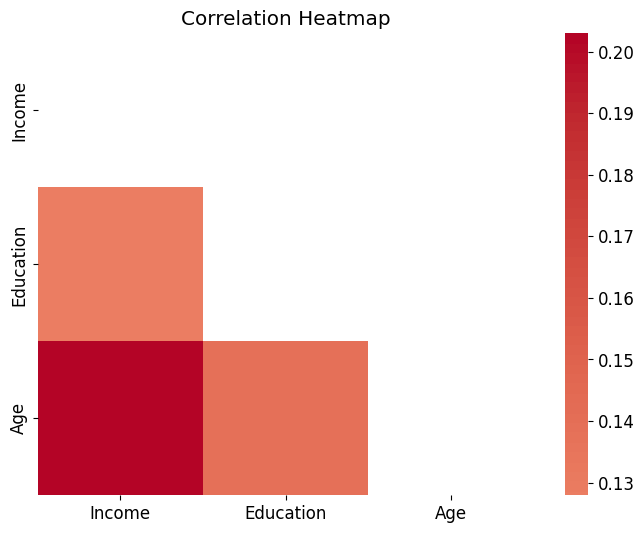

In [208]:
plt.figure(figsize=(8,6))
sns.heatmap(
    data = correlation,
    annot = True,                   
    fmt = '.2f',                    
    cmap = 'coolwarm',               
    center = 0,
    mask = matriks                        
)

plt.title('Correlation Heatmap')
plt.show()

Berdasarkan gambar heatmap diatas menunjukkan bahwa semakin pekat warna(semakin gelap warnanya) maka semakin kuat hubungannya. Namun, selain melihat dari warna kita juga dapat melihat nilai angka korelasinya untuk penarikan kesimpulan sebagai berikut:
- Hubungan antara Income dengan Education menunjukkan hubungan positif, namun hubungannya weak karena (corr<0.3)
- Hubungan antara Income dengan Age menunjukkan hubungan positif, namun hubungannya weak karena (corr<0.3)

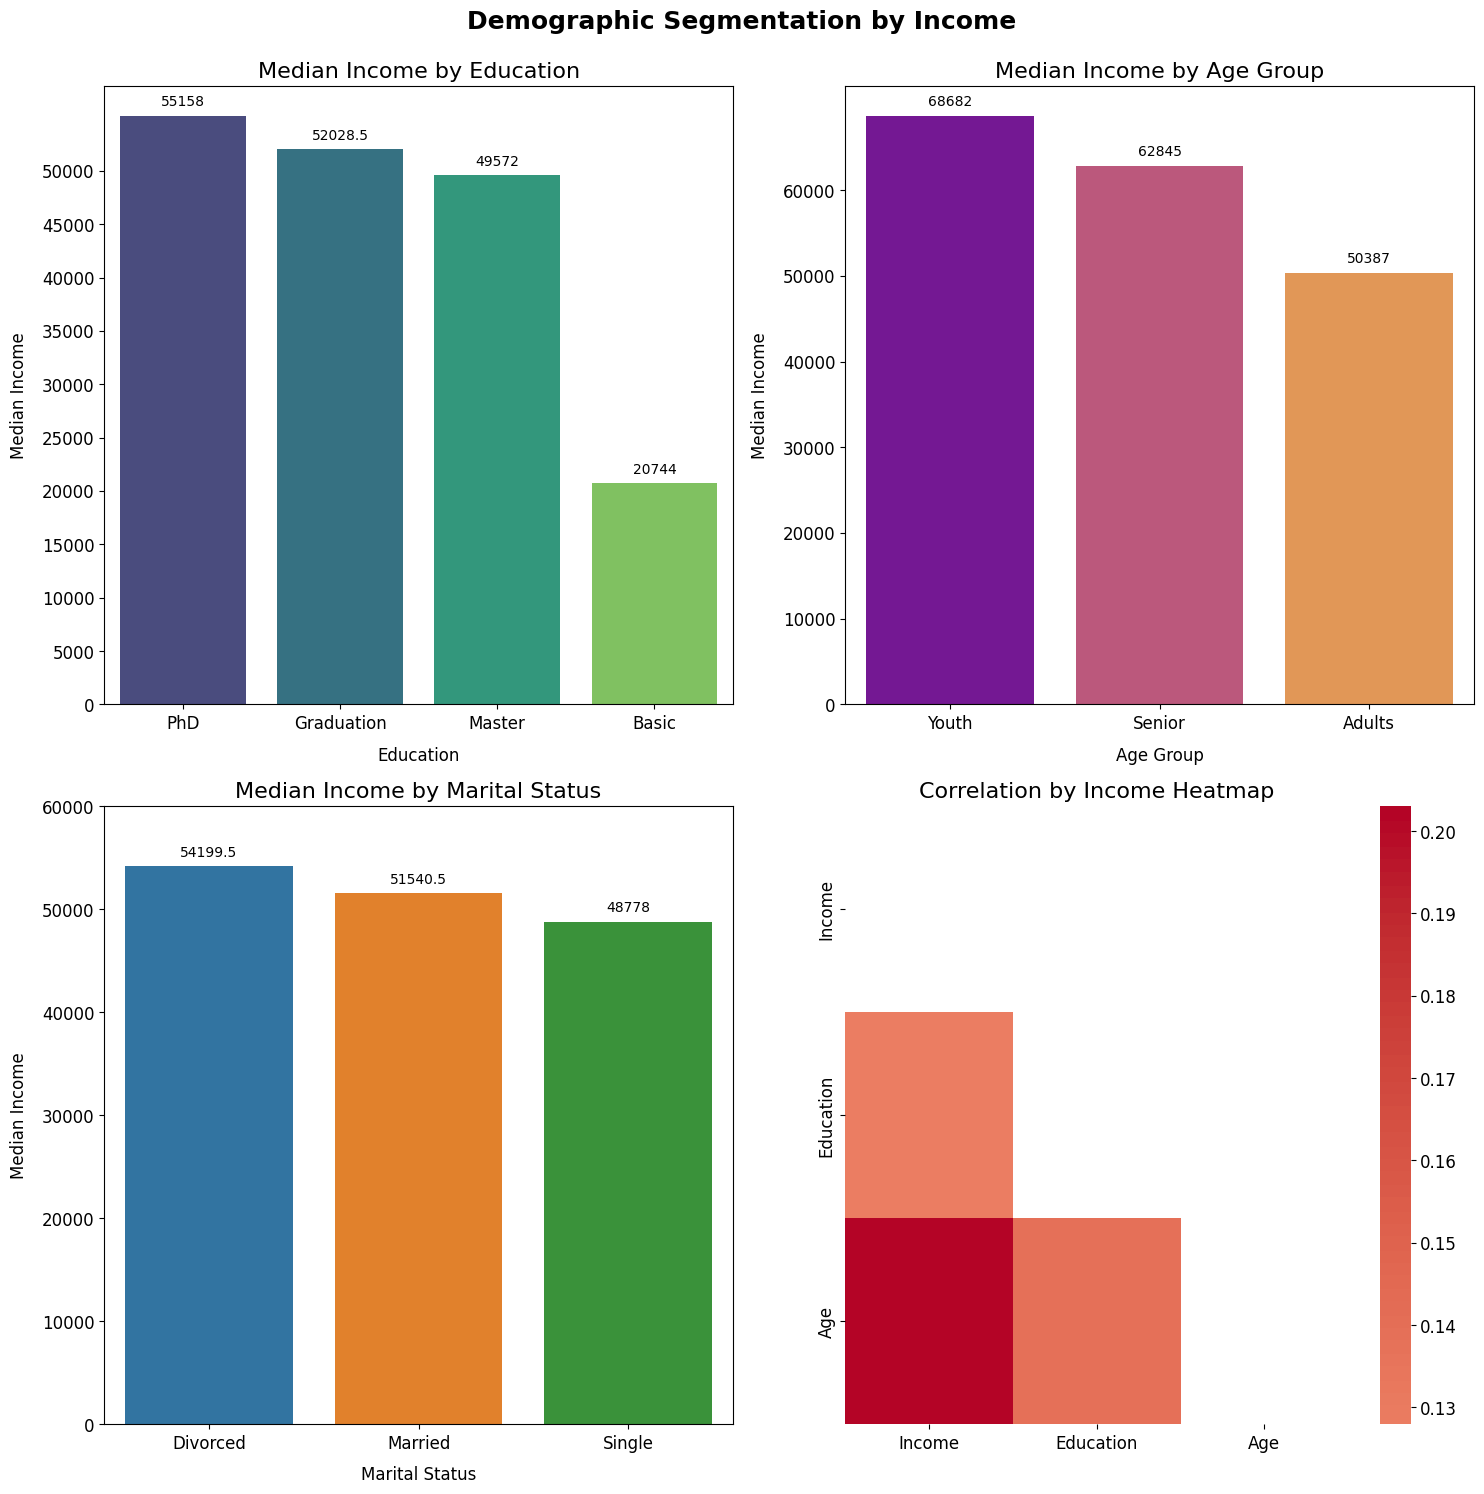

In [209]:
plt.figure(figsize=(15,15))

# Income vs Education
plt.subplot(2, 2, 1)              
plt.title('Median Income by Education', size=16)
ax= sns.barplot(data=df_inc_edc, x='Education', y='Income', errorbar=('ci', 0), palette="viridis")
ax.bar_label(ax.containers[0], fontsize=10, padding= 5)
 
plt.xlabel('Education', size=12, labelpad = 10)
plt.ylabel('Median Income', size=12, labelpad = 10)
plt.yticks(range(0,55000, 5000))


# Income vs Age
plt.subplot(2, 2, 2)
plt.title('Median Income by Age Group', size=16)
ax= sns.barplot(data=df_intage, x='interval age', y='Income', errorbar=('ci', 0), palette='plasma')
ax.bar_label(ax.containers[0], fontsize=10, padding= 5)

plt.xlabel('Age Group', size=12, labelpad = 10)
plt.ylabel('Median Income', size=12, labelpad = 10)
plt.yticks(range(0,65000, 10000))

# Income vs Marital Status
plt.subplot(2, 2, 3)
plt.title('Median Income by Marital Status', size=16)
ax= sns.barplot(data=df_marital, x='Marital_Status', y='Income', errorbar=('ci', 0))
ax.bar_label(ax.containers[0], fontsize=10, padding= 5)

plt.xlabel('Marital Status', size=12, labelpad = 10)
plt.ylabel('Median Income', size=12, labelpad = 10)
plt.yticks(range(0,65000, 10000))


# heatmap correlation
plt.subplot(2, 2, 4)
sns.heatmap(
    data = correlation,
    annot = True,                   
    fmt = '.2f',                    
    cmap = 'coolwarm',               
    center = 0,
    mask = matriks                        
)
plt.title('Correlation by Income Heatmap',size=16)

#Subtitle
plt.suptitle('Demographic Segmentation by Income', size=18, y=0.995, fontweight = 'bold')        

plt.tight_layout()
plt.show()

Berdasarkan gambar `Demographic Segmentation by Income` dapat dilihat bahwa :
- Education `(Median Income terbesar: 'PhD', Median Income terkecil: 'Basic')`
- Age_Group `(Median Income terbesar: 'Youth', Median Income terkecil: 'Adults')`
- Marital_Status `(Median Income terbesar: 'Divorce', Median Income terkecil: 'Single')`

Dikarenakan hasil uji statistik terhadap Income pada setiap segmennya menghasilkan bahwa tidak terdapat perbedaan yang signifikan dan memiliki hubungan yang lemah (corr<0.3). Sehingga penarikan kesimpulan untuk **Demographic Segmentation** berdasarkan **Demographic Segmentation yang memiliki nilai proporsi terbesar** 

Mengacu `Demographic Segmentation dengan proporsi yang terbesar`  dengan `671 Customer  atau 30%` dari data. Sehingga dapat digambarkan `Demographic Segmentation` secara garis besar seperti berikut ini:
- Education :`'Graduation'` dengan `Median Income : 52028.5`
- Age_group: `'Adults'` dengan `Median Income : 50387`
- Marital_Status: `'Married'` dengan `Median Income : 51540.5`

Hasil identifikasi demographic segmentation diatas akan digunakan untuk fokus berikutnya untuk menganalisis **Behavioral Segmentation**

## **b. Behavioral Segmentation** 
**(Purchasing Habits & Spending Habits)**

Langkah selanjutnya setelah mengetahui Demographic Segmentation, kita melakukan identifikasi dan analisis `Behavioral Segmentation(Purcashing Habits & Spending Habits)` terhadap Data Customer yang memiliki `Demographic Segmentation` sebagai berikut:
- `Education : 'Graduation'`
- `Age Group : 'Adult'`
- `Marital_Status : 'Married'`

## **Product**

In [210]:
df_product= df[['Wines', 'Fruits','Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products']].sum().to_frame().reset_index()
df_product

,index,0
0,Wines,680029
1,Fruits,58753
2,Meat Products,373375
3,Fish Products,83931
4,Sweet Products,60552
5,Gold Products,98346


In [211]:
df_product= df_product.rename(columns={'index':'Product', 0:'total'}).sort_values('total', ascending=False).reset_index(drop=True)
df_product

,Product,total
0,Wines,680029
1,Meat Products,373375
2,Gold Products,98346
3,Fish Products,83931
4,Sweet Products,60552
5,Fruits,58753


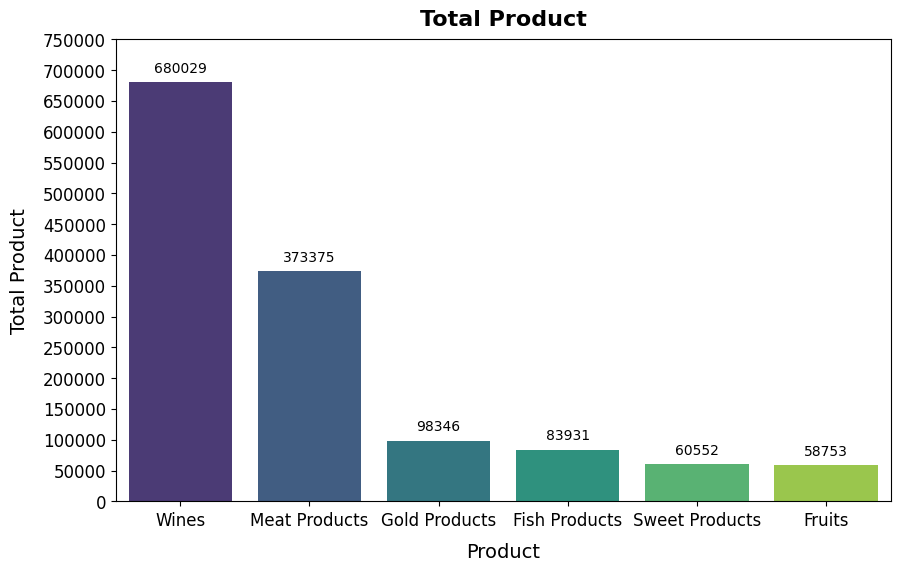

In [212]:
judul = 'Total Product'

plt.figure(figsize=(10,6))

ax= sns.barplot(data=df_product, x='Product', y='total', palette= 'viridis')

ax.bar_label(ax.containers[0], fontsize=10, padding= 5)

plt.title(judul, size=16, pad=10, fontweight = 'bold') 
plt.xlabel('Product', size=14, labelpad = 10)
plt.ylabel('Total Product', size=14, labelpad = 10)
plt.yticks(range(0,800000, 50000))
plt.show()

Berdasarkan Grafik Total Product, dapat kita ketahui bahwa
- `TOP Product` selama 2 tahun penjualan ini adalah `Wines` dengan Jumlah yang terjual sebanyak : `680,029 botol`
- `Bottom Product` adalah `Fruit` dengan Jumlah yang terjual sebanyak : `58753 buah`

- ## Product vs Age

In [213]:
df['int_age'] = df['Age'].apply(ageint)

In [214]:
df_new = pd.melt(df, id_vars=['int_age'], value_vars=['Wines', 'Fruits','Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products'])
df_new= df_new.rename(columns={'variable':'type product'})
df_new.head()

,int_age,type product,value
0,Adults,Wines,635
1,Adults,Wines,11
2,Adults,Wines,426
3,Adults,Wines,11
4,Adults,Wines,173


In [215]:
df_new= df_new.groupby(['int_age','type product'])[['value']].sum().sort_values('value', ascending=False).reset_index()
df_new.head()

,int_age,type product,value
0,Adults,Wines,602788
1,Adults,Meat Products,329182
2,Adults,Gold Products,89587
3,Adults,Fish Products,74669
4,Senior,Wines,60357


- ## Product vs Marital Status

In [216]:
df_product_status= pd.melt(df, id_vars=['Marital_Status'], value_vars=['Wines', 'Fruits','Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products'])
df_product_status= df_product_status.rename(columns={'variable':'type product'})
df_product_status.head()

,Marital_Status,type product,value
0,Single,Wines,635
1,Single,Wines,11
2,Married,Wines,426
3,Married,Wines,11
4,Married,Wines,173


In [217]:
df_product_status= df_product_status.groupby(['Marital_Status','type product'])[['value']].sum().reset_index().sort_values('value', ascending=False)
df_product_status.head()

,Marital_Status,type product,value
11,Married,Wines,435946
9,Married,Meat Products,235749
17,Single,Wines,140300
5,Divorced,Wines,103783
15,Single,Meat Products,88211


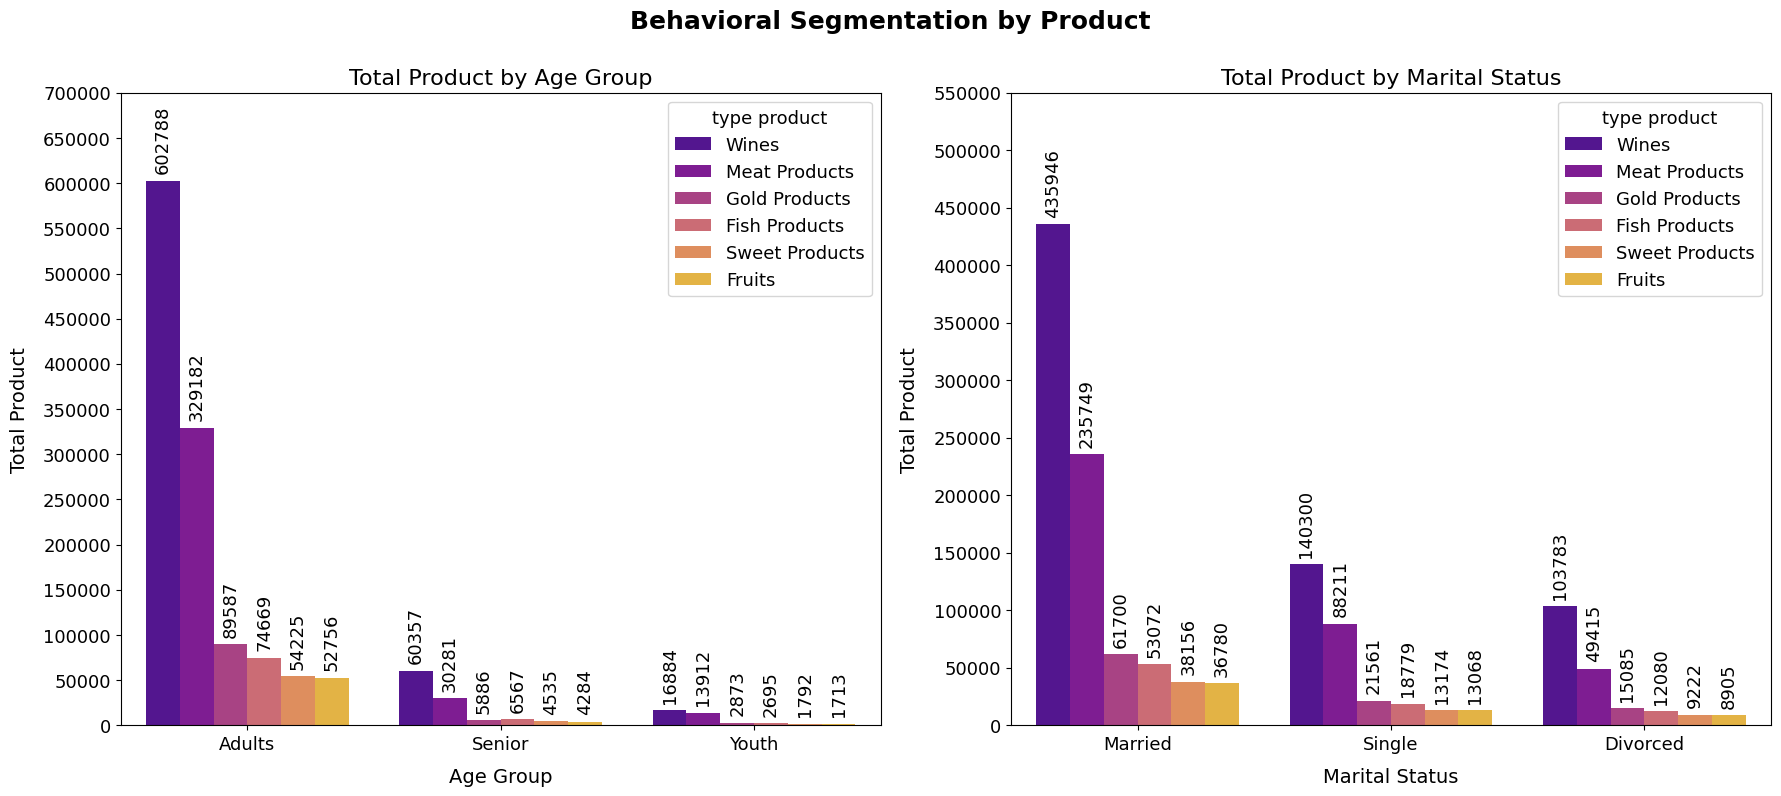

In [218]:
plt.figure(figsize=(18,8))
plt.rcParams['font.size'] = 13.0


# Product vs Age
plt.subplot(1, 2, 1)
plt.title('Total Product by Age Group', size=16)
ax= sns.barplot(data=df_new, x='int_age', y='value', hue='type product', errorbar=('ci', 0), palette='plasma')

for i in range(6):
    ax.bar_label(ax.containers[i], fontsize=13, padding= 5, rotation=90)

plt.xlabel('Age Group', size=14, labelpad = 10)
plt.ylabel('Total Product', size=14, labelpad = 10)
plt.yticks(range(0,700001, 50000))



# Income vs Marital Status
plt.subplot(1, 2, 2)
plt.title('Total Product by Marital Status', size=16)
ax= sns.barplot(data=df_product_status, x='Marital_Status', y='value', hue='type product', errorbar=('ci', 0), palette='plasma')
for i in range(6):
    ax.bar_label(ax.containers[i], fontsize=13, padding= 5, rotation=90)


plt.xlabel('Marital Status', size=14, labelpad = 10)
plt.ylabel('Total Product', size=14, labelpad = 10)
plt.yticks(range(0,550001, 50000))



#Subtitle
plt.suptitle('Behavioral Segmentation by Product', size=18, y=0.995, fontweight = 'bold')        

plt.tight_layout()
plt.show()

Berdasarkan grafik Behavioral Segmentation dengan menjawab Segmentation Purchasing Habits atau TOP Produk/Bottom Produk yang dibeli oleh customer di supermarket yaitu:
- TOP Product : 
    - `Product Wines`  : 
        - Berdasarkan Age Group : `(Adults)` customer yang memiliki rentang umur 25-65 melakukan pembelian terbanyak  dan `(Youth)` customer yang memiliki rentang umur <24 yang melakukan pembelian paling sedikit terhadap produk wine. Hal ini disebabkan karena proporsi Age group `Youth` 1.92% dan rentang umur < 24tahun sedangkan proporsi customer Age Group `Adult` sebanyak 92%. 
        
        - Berdasarkan Marital Status : `Married` yang melakukan pembelian terbanyak dan customer yang memiliki Marital Status : `Divorce` yang melakukan pembelian wines paling sedikit.
    
- Bottom Product : 
    - `Product Fruit` :
        - Berdasarkan Age Group : `(Adults)` customer yang melakukan pembelian terbanyak terhadap produk wine  dan `(Youth)` customer yang memiliki rentang umur <24 yang melakukan pembelian paling sedikit terhadap produk fruit.
        
        - Berdasarkan Marital Status : `Married` yang melakukan pembelian terbanyak dan customer yang memiliki Marital Status : `Divorce` yang melakukan pembelian fruit paling sedikit.

In [219]:
df[(df['Marital_Status'] == 'Married') & (df['Age'] > 25) & (df['Age'] < 65)][['Wines']].sum()

Wines    388573
dtype: int64

In [220]:
df_wine= df.groupby(['Marital_Status', 'int_age'])[['Wines']].sum().sort_values('Wines', ascending=False).reset_index()
df_wine

,Marital_Status,int_age,Wines
0,Married,Adults,390152
1,Single,Adults,121101
2,Divorced,Adults,91535
3,Married,Senior,40631
4,Divorced,Senior,12248
5,Single,Youth,11721
6,Single,Senior,7478
7,Married,Youth,5163


In [221]:
df_fruit= df.groupby(['Marital_Status', 'int_age'])[['Fruits']].sum().sort_values('Fruits', ascending=False).reset_index()
df_fruit

,Marital_Status,int_age,Fruits
0,Married,Adults,33720
1,Single,Adults,11301
2,Divorced,Adults,7735
3,Married,Senior,2717
4,Single,Youth,1370
5,Divorced,Senior,1170
6,Single,Senior,397
7,Married,Youth,343


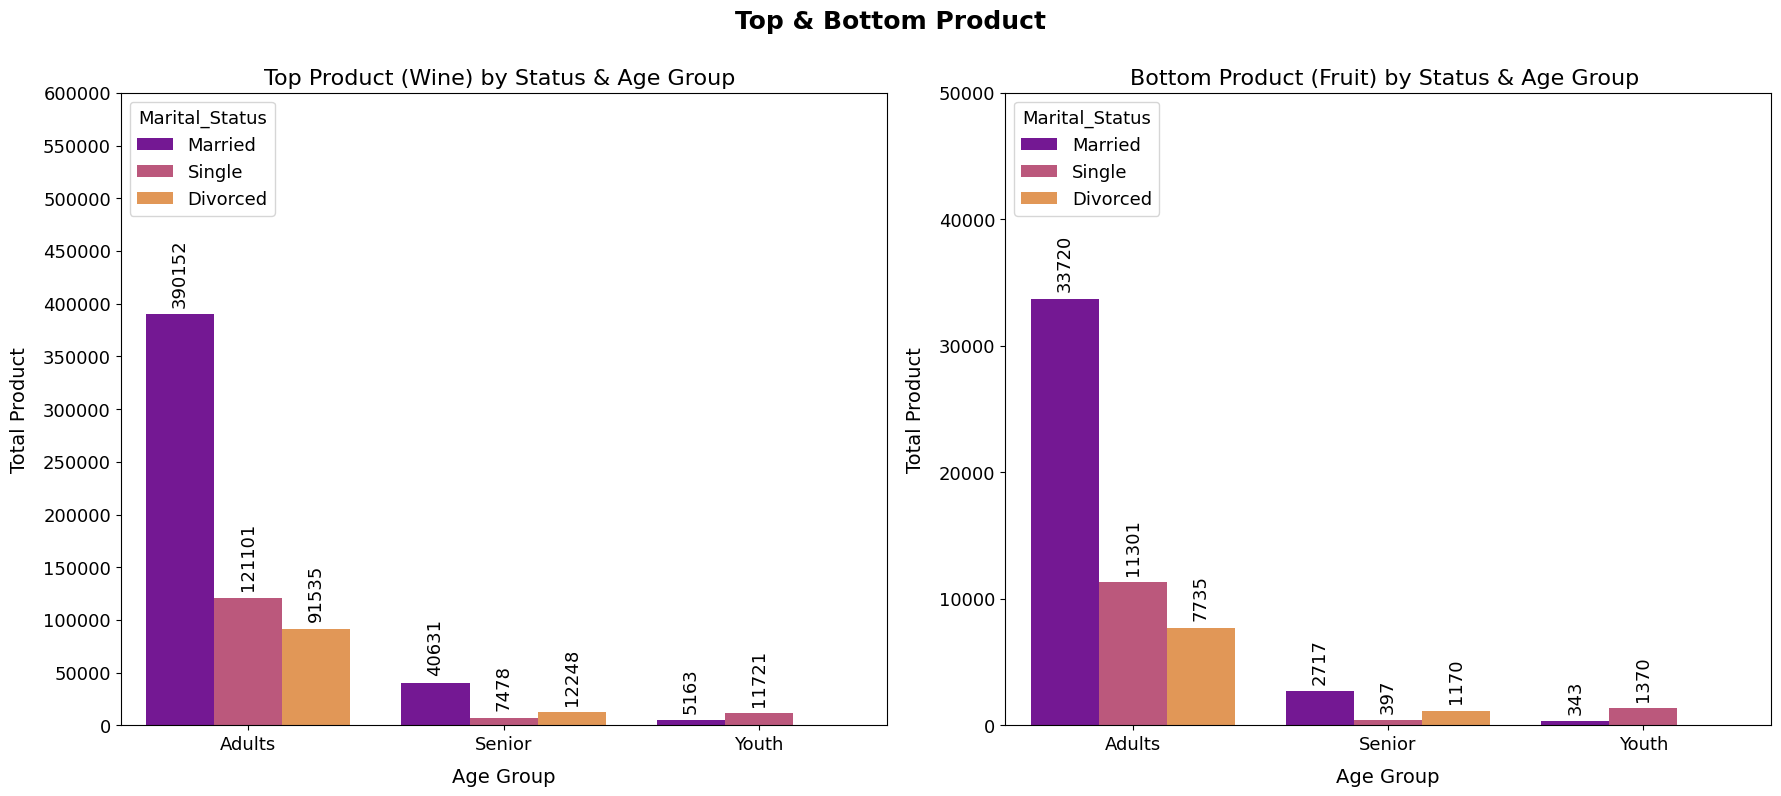

In [222]:
plt.figure(figsize=(18,8))
plt.rcParams['font.size'] = 13.0


# Top Product
plt.subplot(1, 2, 1)
plt.title('Top Product (Wine) by Status & Age Group ', size=16)
ax= sns.barplot(data=df_wine, x='int_age', y='Wines', hue='Marital_Status', errorbar=('ci', 0), palette='plasma')

for i in range(3):
    ax.bar_label(ax.containers[i], fontsize=13, padding= 5, rotation=90)


plt.xlabel('Age Group', size=14, labelpad = 10)
plt.ylabel('Total Product', size=14, labelpad = 10)
plt.yticks(range(0,600001, 50000))



# Bottom Product
plt.subplot(1, 2, 2)
plt.title('Bottom Product (Fruit) by Status & Age Group ', size=16)
ax= sns.barplot(data=df_fruit, x='int_age', y='Fruits', hue='Marital_Status', errorbar=('ci', 0), palette='plasma')

for i in range(3):
    ax.bar_label(ax.containers[i], fontsize=13, padding= 5, rotation=90)

plt.xlabel('Age Group', size=14,labelpad = 10)
plt.ylabel('Total Product', size=14, labelpad = 10)
plt.yticks(range(0,50001, 10000))



#Subtitle
plt.suptitle('Top & Bottom Product', size=18, y=0.995, fontweight = 'bold')        

plt.tight_layout()
plt.show()

In [223]:
df.groupby('int_age')['Wines'].max()

int_age
Adults    1492
Senior    1493
Youth     1332
Name: Wines, dtype: int64

In [224]:
#Customer yang Jumlah Pembelian Wines Terbanyak selama 2 Tahun
df[df['Wines']==1493]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,SumCmp,Total_Product,Total_Purchases,Age,Month Year,int_age
1749,737,1949,PhD,Married,80360.0,0,0,03-03-2013,56,1493,...,1,0,0,0,3,2231,13,66,03-2013,Senior


In [225]:
df[df['Wines']==df[(df['int_age'] == 'Youth')]['Wines'].max()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,SumCmp,Total_Product,Total_Purchases,Age,Month Year,int_age
111,7431,1991,PhD,Single,68126.0,0,0,10-11-2012,40,1332,...,0,0,0,1,2,1820,16,24,11-2012,Youth


In [226]:
df[(df['Wines']>0) & (df['Age']<24)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,SumCmp,Total_Product,Total_Purchases,Age,Month Year,int_age
46,9909,1996,Master,Married,7500.0,0,0,09-11-2012,24,3,...,0,0,0,1,1,122,7,19,11-2012,Youth
140,821,1992,Master,Single,92859.0,0,0,19-10-2012,46,962,...,0,0,0,0,0,2077,21,23,10-2012,Youth
309,1379,1992,Master,Married,42670.0,0,0,27-04-2013,12,154,...,0,0,0,0,0,241,10,23,04-2013,Youth
392,2669,1993,Graduation,Single,74293.0,0,0,04-05-2014,66,375,...,0,0,0,0,0,1127,15,22,05-2014,Youth
417,5067,1994,Graduation,Married,80134.0,0,0,14-02-2014,11,966,...,1,1,0,0,4,1378,20,21,02-2014,Youth
508,3386,1992,Graduation,Married,34935.0,0,0,21-06-2013,71,34,...,0,0,0,0,0,137,7,23,06-2013,Youth
696,8315,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,...,0,0,0,0,0,23,3,20,03-2014,Youth
747,10548,1995,Graduation,Single,71163.0,0,0,09-03-2014,30,283,...,0,0,0,0,0,960,23,20,03-2014,Youth
831,8560,1992,Graduation,Single,48789.0,0,0,10-09-2012,94,351,...,0,0,0,0,0,680,17,23,09-2012,Youth
911,4654,1992,Graduation,Married,75114.0,0,0,07-11-2013,40,571,...,0,0,0,0,0,1253,18,23,11-2013,Youth


**Top Product yaitu `Product Wines`**
- Total Pembelian wines selama 2 tahun ini dengan `total 390,152 botol` oleh rentang umur 25-65 `(Adults)` yang berstatus `Married`.
- Jumlah pembelian terbanyak produk Wines terbanyak pada Age Group Adults yaitu sebanyak 1492 botol, Marital Status: Married, Umur : 66 Tahun (Data Customer ID: 737)

- Total pembelian paling sedikit pada Age_Group `Youth` berstatus Married, hal ini dikarenakan jumlah customer pada Age Group tersebut yang sudah menikah hanya 39.53%.

**Bottom Product yaitu `Fruits`**
- Total pembelian produk fruit banyak dibeli selama 2 tahun ini dengan `total 33,720 buah` oleh rentang umur 25-65 `(Adults)`dengan status `Married` 
- pembelian paling sedikit pada Age_Group `Youth` berstatus `Married`.

**Dapat dilihat baik pada top produk dan bottom product nilai pemebelian pada age group : `Youth` dan marital status `divorce` bernilai `nol` karena pada range umur <24 tahun tidak ada Marital Status : Divorce**

Penjualan terhadap Wines (Top Product) dapat menjadi Produk unggulan di Supermarket tersebut. Untuk meningkatkan penjualan berikan penawaran(Campaign/Diskon) terhadap customer yang pada Age_group: 'Adults' dan berstatus `Married` atau pada customer yang memiliki demografi yang memiliki jumlah pembelian paling sedikit `(Age_Group : 'Youth', 'Married')`. Namun pada kasus ini menjadi pengecualian untuk Age_Group `Youth` hanya untuk berstatus Married/Single dengan umur>21 tahun (legal age)

## **Media Purchase**

In [227]:
df_media_purchases= df[['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases']].sum().to_frame().reset_index()
df_media_purchases

,index,0
0,NumWebPurchases,9140
1,NumCatalogPurchases,5955
2,NumStorePurchases,12959


In [228]:
df_media_purchases= df_media_purchases.rename(columns={'index':'Media Purchases', 0:'total'}).sort_values('total', ascending=False).reset_index(drop=True)
df_media_purchases

,Media Purchases,total
0,NumStorePurchases,12959
1,NumWebPurchases,9140
2,NumCatalogPurchases,5955


In [229]:
df_media = pd.melt(df, id_vars=['int_age'], value_vars=['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases'])
df_media= df_media.rename(columns={'variable':'Media Purchase'})
df_media.head()

,int_age,Media Purchase,value
0,Adults,NumStorePurchases,4
1,Adults,NumStorePurchases,2
2,Adults,NumStorePurchases,10
3,Adults,NumStorePurchases,4
4,Adults,NumStorePurchases,6


In [230]:
df_media= df_media.groupby(['int_age', 'Media Purchase'])[['value']].sum().sort_values('value', ascending=False).reset_index()
df_media

,int_age,Media Purchase,value
0,Adults,NumStorePurchases,11772
1,Adults,NumWebPurchases,8319
2,Adults,NumCatalogPurchases,5270
3,Senior,NumStorePurchases,920
4,Senior,NumWebPurchases,664
5,Senior,NumCatalogPurchases,501
6,Youth,NumStorePurchases,267
7,Youth,NumCatalogPurchases,184
8,Youth,NumWebPurchases,157


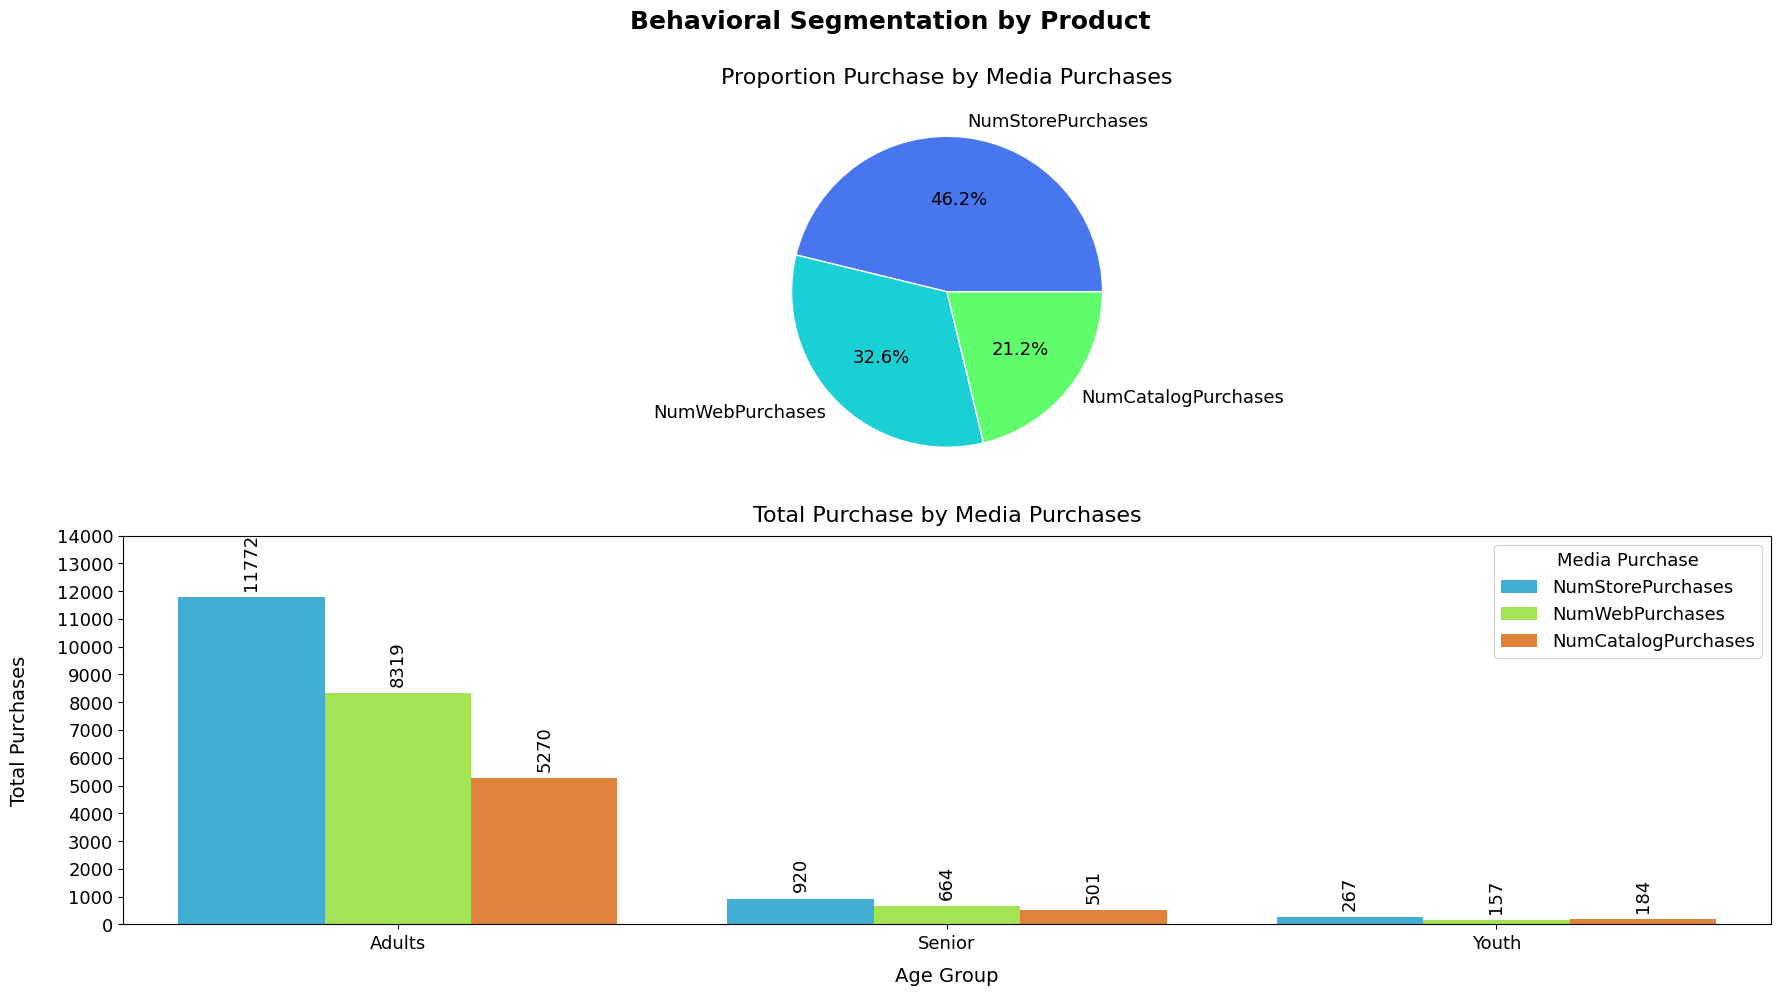

In [231]:
plt.figure(figsize=(18,10))
plt.rcParams['font.size'] = 13.0


# Pie chart media purchases
plt.subplot(2, 1,1)
judul = 'Proportion Purchase by Media Purchases'
plt.pie(
    x= df_media_purchases['total'],
    labels= df_media_purchases['Media Purchases'],
    autopct= f'%.1f%%',
    explode= [0, 0, 0],
    colors=sns.color_palette('turbo'),
    wedgeprops=dict(edgecolor='white')
)
plt.title(judul, size=16, pad=10) 


# Total Purchases by Media Purchases
plt.subplot(2, 1,2)
judul = 'Total Purchase by Media Purchases'

ax= sns.barplot(data=df_media, x='int_age', y='value', hue= 'Media Purchase', ci=0, palette='turbo')
for i in range(3):
    ax.bar_label(ax.containers[i], fontsize=13, padding= 5, rotation=90)

plt.title(judul, size=16, pad=10) 
plt.xlabel('Age Group', size=14, labelpad = 10)
plt.ylabel('Total Purchases', size=14, labelpad = 20)
plt.yticks(range(0,15000, 1000))



#Subtitle
plt.suptitle('Behavioral Segmentation by Product', size=18, y=0.995, fontweight = 'bold')        

plt.tight_layout()
plt.show()

`Berdasarkan grafik diatas sebanyak 46.2% melakukan transaksi pembelanjaan ke Store Supermarket.`

## **Analisis terhadap Loyalitas Pelanggan**
Analisis ini digunakan untuk menentukan bahwa seorang pelanggan loyal terhadap Produk/Layanan yang tersedia pada Supermaket. Data ini akan digunakan sebagai acuan karakteristik pelanggan yang loyal.

## **Campaign**

In [232]:
df_campaign= df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response']].sum().to_frame().reset_index()
df_campaign

,index,0
0,AcceptedCmp1,144
1,AcceptedCmp2,30
2,AcceptedCmp3,163
3,AcceptedCmp4,167
4,AcceptedCmp5,162
5,Response,334


In [233]:
df_campaign= df_campaign.rename(columns={'index':'Type Campaign', 0:'total'}).sort_values('total', ascending=False).reset_index(drop=True)
df_campaign

,Type Campaign,total
0,Response,334
1,AcceptedCmp4,167
2,AcceptedCmp3,163
3,AcceptedCmp5,162
4,AcceptedCmp1,144
5,AcceptedCmp2,30


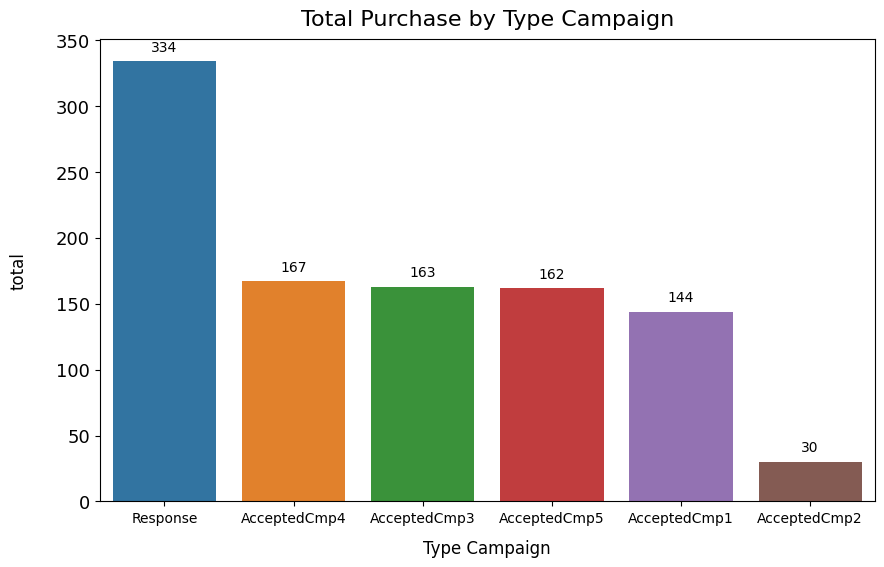

In [234]:
judul = 'Total Purchase by Type Campaign'

plt.figure(figsize=(10,6))

ax= sns.barplot(data=df_campaign, x='Type Campaign', y='total', ci=0)

ax.bar_label(ax.containers[0], fontsize=10, padding= 5)

plt.title(judul, size=16, pad=10) 
plt.xlabel('Type Campaign', size=12, labelpad = 10)
plt.ylabel('total', size=12, labelpad = 20)
plt.xticks(size=10)
plt.yticks(range(0,400, 50))
plt.show()

- Berdasarkan grafik diatas ternyata didapatkan hasil sebagai berikut : 
- 144 Customer menyetujui Campaign pada penawaran ke-1
- 30 Customer menyetujui Campaign pada penawaran ke-2
- 163 Customer menyetujui Campaign pada penawaran ke-3
- 167 Customer menyetujui Campaign pada penawaran ke-4
- 162 Customer menyetujui Campaign pada penawaran ke-5
- 334 Customer yang menyetujui Campaign pada penawaran terakhir 

Jika dilihat semakin sering dilakukannya penawaran terhadap produk Campaign, jumlah customer semakin naik dibandingkan jumlah customer pada campaign sebelumnya. Hal ini dapat disebabkan ketika customer menolak sebuah Campaign, Supermarket menawarkan Campaign dengan Penawaran yang lebih menarik dari Campaign sebelumnya.

- Namun berbeda dengan Campaign pada penawaran ke-2 mengalami penurunan.  

Berikut ini data customer yang melakukan transaksi pada Campaign ke-2: 

In [235]:
df[df['AcceptedCmp2']==1][['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'SumCmp']]

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,SumCmp
252,1,1,0,1,1,1,5
295,0,1,0,1,0,0,2
342,0,1,0,1,0,0,2
417,1,1,0,1,1,0,4
430,1,1,0,1,1,1,5
559,1,1,0,1,1,1,5
575,1,1,0,1,0,1,4
804,1,1,0,1,0,1,4
822,0,1,0,0,0,1,2
824,1,1,0,1,1,1,5


In [236]:
df[df['AcceptedCmp2']==1][['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products', 'Complain', 'Total_Product', 'Total_Purchases']]

,Wines,Fruits,Meat Products,Fish Products,Sweet Products,Gold Products,Complain,Total_Product,Total_Purchases
252,168,148,444,32,172,148,0,1112,28
295,1241,0,80,0,13,40,0,1374,20
342,1103,0,45,0,0,34,0,1182,17
417,966,26,282,52,26,26,0,1378,20
430,1248,16,349,43,16,16,0,1688,15
559,1492,38,287,50,57,33,0,1957,19
575,1050,12,144,0,0,24,0,1230,18
804,1039,43,204,153,58,29,0,1526,22
822,464,5,64,7,0,37,0,577,17
824,1492,38,287,50,57,33,0,1957,19


In [237]:
df[df['AcceptedCmp2']==1][['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
252,1,6,9,13,2
295,3,3,6,11,8
342,3,4,2,11,8
417,1,2,7,11,5
430,1,2,4,9,4
559,1,5,10,4,6
575,3,6,4,8,5
804,3,2,8,12,8
822,1,7,3,7,5
824,1,5,10,4,6


Berdasarkan data diatas kami melakukan pengecekan karakteristik pelanggan yang menyetujui Campaign ke-2. 

- Produk yang ditawarkan pada campaign ke-2 kurang menarik/tidak sesuai kebutuhan customer. Sehingga kita melakukan pengecekan produk. Karena keterbatasan data dan sumber informasi mengenai produk apa saja yang dibeli ketika Campaign ke-2 kami belum dapat menyimpulkan bahwa Campaign dipengaruhi oleh Produk. 

- Campaign tidak dipengaruhi oleh Diskon, karena dilihat dari `NumDealsPurchases` terhadap campaign tidak memiliki pola dan kita tidak dapat mengetahui customer melakukan transaksi diskon dan menyetujui campaign.

Sehingga kita dapat merekomendasikan untuk dilakukan peninjauan ulang datanya sebagai bahan analisis selanjutnya.

In [238]:
df[df['SumCmp'] == 5]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,SumCmp,Total_Product,Total_Purchases,Age,Month Year,int_age
252,10089,1974,Graduation,Divorced,102692.0,0,0,05-04-2013,5,168,...,1,1,0,1,5,1112,28,41,04-2013,Adults
430,3725,1961,PhD,Single,84865.0,0,0,09-05-2013,1,1248,...,1,1,0,1,5,1688,15,54,05-2013,Adults
559,3174,1959,Graduation,Married,87771.0,0,1,22-05-2013,61,1492,...,1,1,0,1,5,1957,19,56,05-2013,Adults
824,5536,1959,Graduation,Married,87771.0,0,1,22-05-2013,61,1492,...,1,1,0,1,5,1957,19,56,05-2013,Adults
990,8545,1954,Graduation,Divorced,85683.0,0,0,21-03-2014,6,1296,...,1,1,0,1,5,1789,16,61,03-2014,Adults
1087,1509,1958,PhD,Married,84460.0,0,0,04-01-2013,80,152,...,1,1,0,1,5,523,22,57,01-2013,Adults
1308,5758,1982,Graduation,Married,65169.0,0,0,14-01-2014,23,1074,...,1,1,0,1,5,1189,27,33,01-2014,Adults
1710,477,1986,Graduation,Married,83512.0,0,0,17-06-2014,31,1060,...,1,1,0,1,5,2157,21,29,06-2014,Adults
1922,3138,1956,Graduation,Single,91249.0,0,0,20-10-2012,84,1324,...,1,1,0,1,5,1676,22,59,10-2012,Adults
2167,3520,1990,Master,Single,91172.0,0,0,27-03-2013,94,162,...,1,1,0,1,5,1092,14,25,03-2013,Adults


- Berdasarkan data campaign dapat dilihat bahwa semakin loyal customer terhadap Perusahaan maka semakin tinggi total campaign(maksimal= 5), berarti customer menyetujui/melakukan transaksi di setiap penawaran campaign. 
- Berdasarkan hasil terdapat `10 customer yang menyetujui/melakukan transaksi` di setiap Campaign (`'SumCmp' = 5`) 

### **Total_Purchases & Recency**

Customer yang loyal berdasarkan Behavioral Habits :
- Purchasing habits : Seberapa sering customer melakukan transaksi baik dari media purchases manapun (Semakin tinggi nilai Total_Purchases, maka semakin loyal customer tersebut) & (Semakin kecil nilai Recency, dapat mengidentifikasi customer datang baru-baru ini)
- setelah melakukan analisis terhadap purchasing habits, maka kita lihat dari Spending Habitsnya : Seberapa banyak produk yang dibeli (Semakin tinggi nilai Total_Product maka semakin baik)

In [239]:
df[['ID', 'Age','int_age', 'Education', 'Marital_Status', 'Income', 'SumCmp','Recency', 'Total_Product', 'Total_Purchases']].sort_values(['Total_Purchases','Recency', 'Total_Product'],ascending=[False, True, False]).head(10)

,ID,Age,int_age,Education,Marital_Status,Income,SumCmp,Recency,Total_Product,Total_Purchases
412,7030,60,Adults,PhD,Married,66465.0,1,1,1485,32
1252,5153,48,Adults,PhD,Married,77766.0,2,97,1529,32
1669,4127,48,Adults,PhD,Married,77766.0,2,97,1529,32
67,9369,36,Adults,Master,Single,88194.0,3,19,1274,31
636,6945,63,Adults,Graduation,Single,84574.0,0,72,1375,31
646,4611,45,Adults,Graduation,Married,105471.0,3,36,1724,30
1674,3389,45,Adults,Graduation,Married,69016.0,0,61,1533,30
1212,2324,43,Adults,Graduation,Married,77044.0,1,12,1065,29
687,1501,33,Adults,PhD,Married,160803.0,0,21,1717,29
470,2021,40,Adults,Graduation,Married,61456.0,0,47,1388,29


Berdasarkan kolom diatas menunjukkan 10 data customer yang loyal berdasarkan Behavioral Segmentation. 

`Customer yang paling loyal dengan melakukan transaksi sebanyak 32 kali, kedatangan pelanggan 1 hari sejak pembelian terakhir pelanggan (recently), total_product sebanyak 1485 produk.`

`10 customer yang loyal tersebut dapat menjadi fokus perusahaan/menjadi prioritas dengan memberikan berbagai penawaran special dan hadiah berupa voucher diskon/mendapat produk tambahan.`

# **Kesimpulan**

Dari analisis yang telah dilakukan, dapat disimpulkan bahwa Market Segmentation Customer berdasarkan Demographic Segmentation dan Behavioral Segmentation karakteristik pembeli sebagai berikut:

1. Demographic Segmentation Customer Supermarket
- Education     : 50.4% customer supermarket memiliki latar belakang pendidikan `Graduation`
- Age Group     : 92% customer supermarket memiliki usia di rentang umur 25-65 tahun Group `Adults`
- Marital Status: 64.5% customer supermarket berstatus `Married`
- Income :
    - Education :`'Graduation'` dengan `Median Income : 52028.5`
    - Age_group: `'Adults'` dengan `Median Income : 50387`
    - Marital_Status: `'Married'` dengan `Median Income : 51540.5`

 
2. Behavioral Segmentation Customer Supermarket
<br><br> 
    a. Purchasing habits berdasarkan TOP produk:\
        - Age Group (`Adults`) : `Wines`\
        - Marital Status (`Married`) : `Wines`\
    -Spending habits :\
            - Total pembelian terbanyak wines berdasarkan Age Group `Adults` dan berstatus `Married` : 390152
<br><br>

    b. Purchasing habits berdasarkan Bottom produk & bottom customer:\
        -Age Group (`Youth`) : `Fruit`\
        - Marital Status (`Divorce`) : `Fruit`\
    -Spending habits :\
        - Total pembelian fruit berdasarkan Age Group `Youth` : 1713\
        - Total pembelian fruit berstatus `Divorce` : 8935

    c. Media purchasing : Mengunjungi Store Supermarket

3. Berdasarkan data campaign dapat dilihat bahwa semakin loyal customer terhadap Perusahaan maka semakin tinggi total campaign(maksimal= 5), berarti customer menyetujui/melakukan transaksi di setiap penawaran campaign. 
4. Customer yang paling loyal dengan melakukan transaksi sebanyak 32 kali, kedatangan pelanggan 1 hari sejak pembelian terakhir pelanggan (recently), total_product sebanyak 1485 produk.

# **Rekomendasi**

1. Produk wines menjadi produk unggulan Supermarket. Untuk menambah profit perusahaan maka lakukan penjualan wines dengan fokus customer yang dengan latar belakang berpendidikan Graduation, range umur 25-65 tahun, atau bersatus married.
2. Melakukan promo pada Bottom Produk  untuk meningkatkan profit.
3. Melakukan campaign terhadap Top Produk
5. Strategi agar Bottom produk dapat terjual dilakukan mixing camapign antara TOP produk dan Bottom Produk (Contoh:apabila customer membeli produk fruit maka akan mendapatkan potongan terhadap pemebalian wines)
6. Supermarket melakukan penawaran dan reward seperti pemberian voucher potongan harga, hadiah berdasarkan minimum pembelian dsb terhadap customer yang loyal (nilai Total_Purchases yang semakin tinggi, recency semakin kecil dan nilai total semakin tinggi) 
